In [2]:
#Dataset libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

#ML libraries 
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV


## Feature Selection

In [10]:
# load RING dataset
file_path = "dataset\RING_data.txt"
df = pd.read_csv(file_path, delimiter="\t")

# basic info about the dataset
print("\n Dataset Info:")
print(df.info())

# first 5 rows
print("\n First 5 rows of the dataset:")
display(df.head())

# check for missing values
print("\n Missing Values per Column:")
print(df.isnull().sum())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               86400 non-null  int64  
 1   netName          86400 non-null  object 
 2   brVariability    86400 non-null  int64  
 3   flowName         86400 non-null  object 
 4   flowTypeId       86400 non-null  int64  
 5   priority         86400 non-null  int64  
 6   trWindow         86400 non-null  float64
 7   bitrate          86400 non-null  float64
 8   burstSize        86400 non-null  int64  
 9   latLimit         86400 non-null  int64  
 10  hops             86400 non-null  int64  
 11  buffers          86400 non-null  int64  
 12  latStatic        86400 non-null  float64
 13  latWCmodel       86400 non-null  float64
 14  latSim           86400 non-null  float64
 15  latHPsum         86400 non-null  float64
 16  latEPsum         86400 non-null  float64
 

,id,netName,brVariability,flowName,flowTypeId,priority,trWindow,bitrate,burstSize,latLimit,...,latEPotherINsum,latLPsum,latOverallWC,latOverallSim,latCheck,net,topType,nodes,RUs,mu
0,0,RING5_RU10,0,FH_UL,0,2,0.000033,22.5980,61,111,...,13.16900,1.85040,84.938,77.299,OK,RING,1,5,10,1
1,1,RING5_RU10,0,MH_UL,2,0,0.000033,3.3340,9,1000,...,0.27756,0.00000,147.760,136.100,OK,RING,1,5,10,1
2,2,RING5_RU10,0,FH_DL,1,2,0.000033,22.9680,62,111,...,0.00000,1.11020,75.562,73.403,OK,RING,1,5,10,1
3,3,RING5_RU10,0,MH_DL,3,0,0.000033,4.4454,12,1000,...,0.00000,0.00000,162.650,136.050,OK,RING,1,5,10,1
4,4,RING5_RU10,0,FH_UL,0,2,0.000033,22.5980,61,64,...,5.64370,0.37008,50.047,45.535,OK,RING,1,5,10,1



 Missing Values per Column:
id                 0
netName            0
brVariability      0
flowName           0
flowTypeId         0
priority           0
trWindow           0
bitrate            0
burstSize          0
latLimit           0
hops               0
buffers            0
latStatic          0
latWCmodel         0
latSim             0
latHPsum           0
latEPsum           0
latEPsumMax        0
latEPsameINsum     0
latEPotherINsum    0
latLPsum           0
latOverallWC       0
latOverallSim      0
latCheck           0
net                0
topType            0
nodes              0
RUs                0
mu                 0
dtype: int64


In [11]:
# backup before modifying X
backup_file = "dataset/RING_data_backup.csv"

if not os.path.exists(backup_file):
    df.to_csv(backup_file, index=False)
    print("Backup created: RING_data_backup.csv")
else:
    print("Backup already exists. Using the existing backup.")

Backup already exists. Using the existing backup.


In [12]:
# load RING dataset

import pandas as pd

df_original = pd.read_csv("dataset/RING_data_backup.csv")

print("Shape:", df_original.shape)
print("Columns:", df_original.columns.tolist())

Shape: (86400, 29)
Columns: ['id', 'netName', 'brVariability', 'flowName', 'flowTypeId', 'priority', 'trWindow', 'bitrate', 'burstSize', 'latLimit', 'hops', 'buffers', 'latStatic', 'latWCmodel', 'latSim', 'latHPsum', 'latEPsum', 'latEPsumMax', 'latEPsameINsum', 'latEPotherINsum', 'latLPsum', 'latOverallWC', 'latOverallSim', 'latCheck', 'net', 'topType', 'nodes', 'RUs', 'mu']


Shape: (86400, 29)
Columns: ['id', 'netName', 'brVariability', 'flowName', 'flowTypeId', 'priority', 'trWindow', 'bitrate', 'burstSize', 'latLimit', 'hops', 'buffers', 'latStatic', 'latWCmodel', 'latSim', 'latHPsum', 'latEPsum', 'latEPsumMax', 'latEPsameINsum', 'latEPotherINsum', 'latLPsum', 'latOverallWC', 'latOverallSim', 'latCheck', 'net', 'topType', 'nodes', 'RUs', 'mu']

Correlation Matrix:
                       id  brVariability    flowTypeId      priority  \
id               1.000000            NaN  3.586096e-05 -2.004688e-05   
brVariability         NaN            NaN           NaN           NaN   
flowTypeId       0.000036            NaN  1.000000e+00 -8.944272e-01   
priority        -0.000020            NaN -8.944272e-01  1.000000e+00   
trWindow        -0.144338            NaN -8.143920e-16 -1.365281e-15   
bitrate          0.001394            NaN -8.806419e-01  9.992800e-01   
burstSize       -0.058132            NaN -7.633720e-01  8.676532e-01   
latLimit        -0.000670

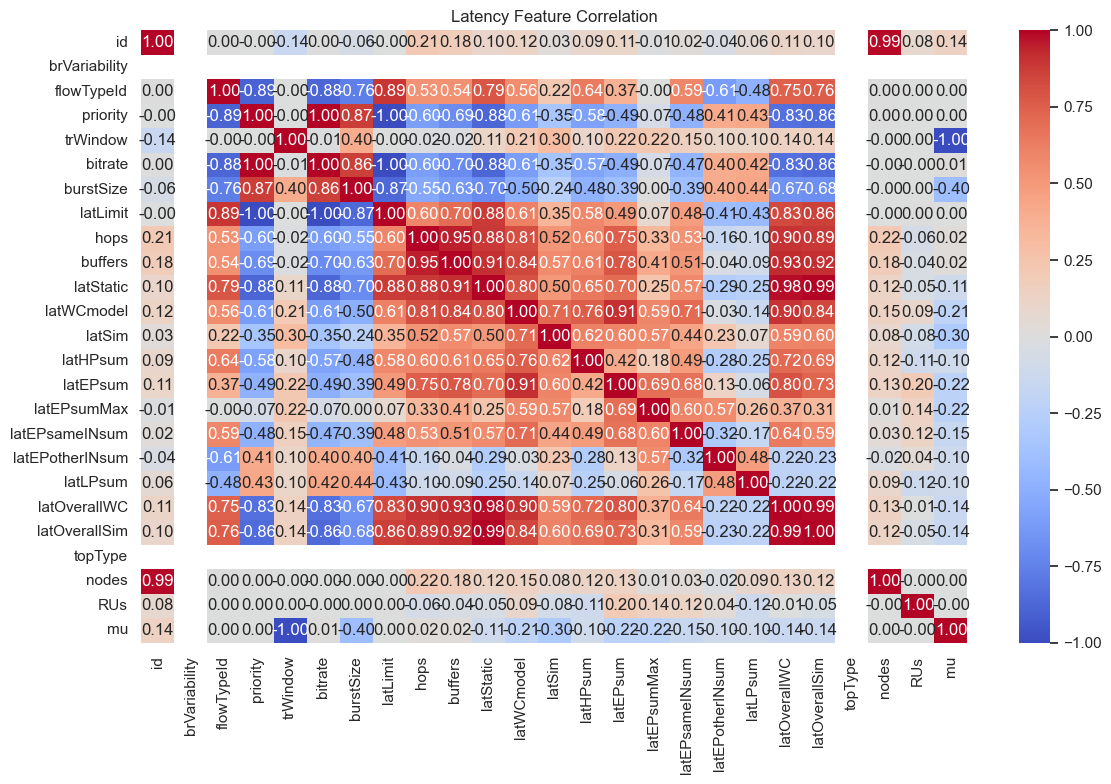

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df_original = pd.read_csv("dataset/RING_data_backup.csv")

print("Shape:", df_original.shape)
print("Columns:", df_original.columns.tolist())

# Keep only numeric columns
latency_correlation = df_original.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = latency_correlation.corr()

# Print correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Latency Feature Correlation")
plt.tight_layout()


 Correlation Between Latency Variables:
               latOverallSim  latOverallWC    latSim
latOverallSim       1.000000      0.987888  0.602551
latOverallWC        0.987888      1.000000  0.593939
latSim              0.602551      0.593939  1.000000


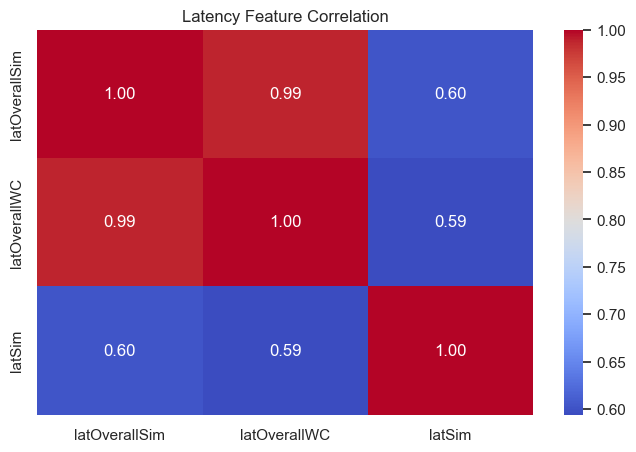

In [30]:
# compare correlation of different latency related columns
latency_correlation = df_original[["latOverallSim", "latOverallWC", "latSim"]].corr()

# correlation matrix
print("\n Correlation Between Latency Variables:")
print(latency_correlation)

# heatmap for better visualization
plt.figure(figsize=(8, 5))
sns.heatmap(latency_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Latency Feature Correlation")
plt.show()


In [29]:
# COLUMNS AND TARGET VARIABLE

feasible_cols = [
    "flowTypeId",
    "priority",
    "trWindow",
    "bitrate",
    "burstSize",
    "latLimit",
    "hops",
    "buffers",
    "latStatic",
    "latWCmodel",
    "latEPsum",
]

# filter flows FH_UL / FH_DL
mask_fh = df_original["flowName"].isin(["FH_UL","FH_DL"])
df_filtered = df_original.loc[mask_fh, feasible_cols].copy()

# binary target from latOverallSim > 100
df_original["latClass"] = (df_original["latOverallSim"] > 100).astype(int)
y = df_original.loc[mask_fh, "latClass"]


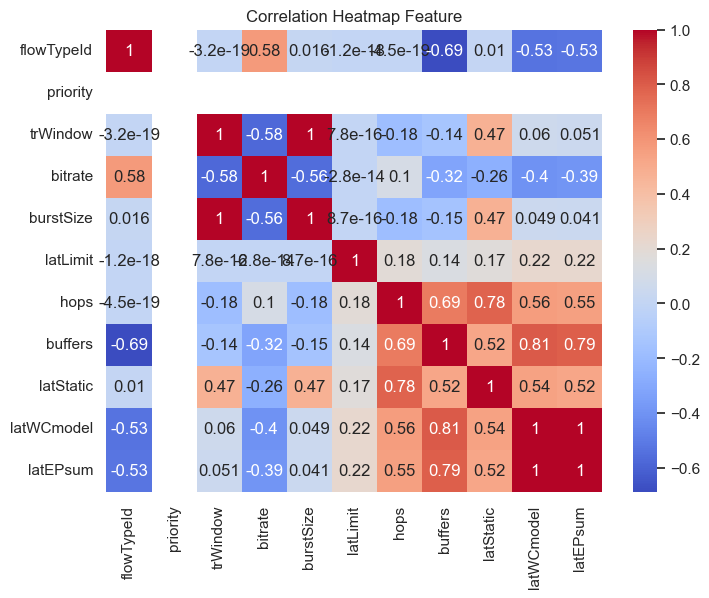

In [31]:
# Feature Correlation Heatmap

corr_matrix = df_filtered.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Feature")
plt.show()

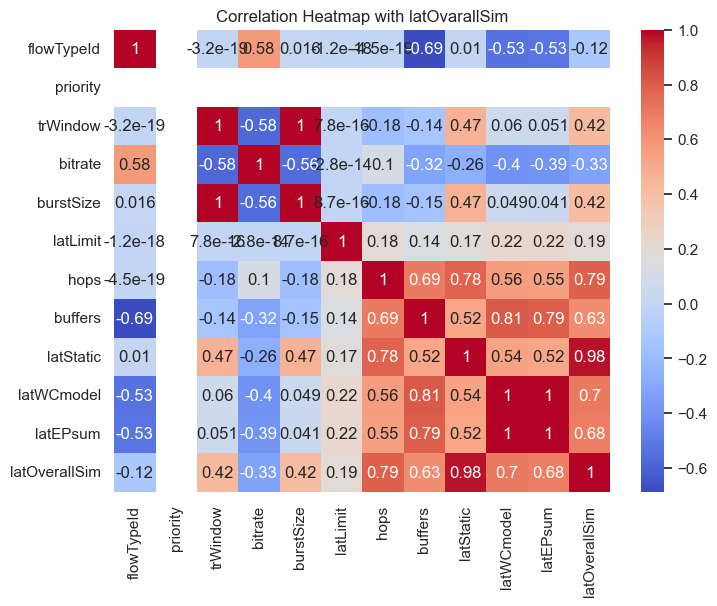

In [32]:
## Feature + latOverallSim

feature_corr_test = [
    "flowTypeId",
    "priority",
    "trWindow",
    "bitrate",
    "burstSize",
    "latLimit",
    "hops",
    "buffers",
    "latStatic",
    "latWCmodel",
    "latEPsum",
    "latOverallSim"
]

# filter flows FH_UL / FH_DL
mask_fh = df_original["flowName"].isin(["FH_UL","FH_DL"])
df_test_corr = df_original.loc[mask_fh, feature_corr_test].copy()

corr_matrix_test = df_test_corr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_test, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with latOvarallSim")
plt.show()

In [33]:
# Drop features after correlation heatmaps

features_to_drop = ["priority","latEPsum","trWindow"]
df_filtered = df_filtered.drop(columns=features_to_drop)

print(df_filtered.columns)

Index(['flowTypeId', 'bitrate', 'burstSize', 'latLimit', 'hops', 'buffers',
       'latStatic', 'latWCmodel'],
      dtype='object')


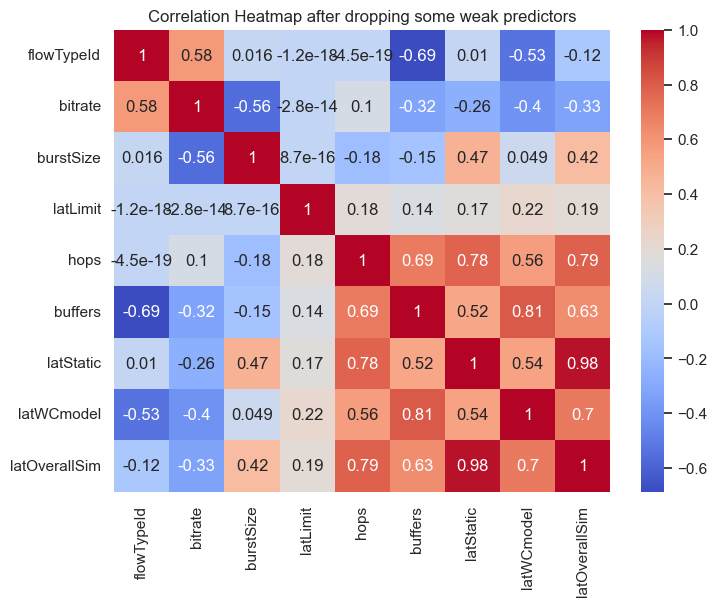

In [34]:
feature_corr_test = [
    "flowTypeId",
    "bitrate",
    "burstSize",
    "latLimit",
    "hops",
    "buffers",
    "latStatic",
    "latWCmodel",
    "latOverallSim"
]

# filter flows FH_UL / FH_DL
mask_fh = df_original["flowName"].isin(["FH_UL","FH_DL"])
df_test_corr = df_original.loc[mask_fh, feature_corr_test].copy()

corr_matrix_test = df_test_corr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_test, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap after dropping some weak predictors")
plt.show()

In [35]:
# VIF 1

df_num = df_filtered.select_dtypes(include=["float","int"]).copy()
df_num["Intercept"] = 1

vif_values = []
for i in range(df_num.shape[1]):
    vif = variance_inflation_factor(df_num.values, i)
    vif_values.append((df_num.columns[i], vif))

# column with VIF>10 must be dropped
for col,vifval in vif_values:
    print(col, vifval)



flowTypeId 11.720447532146554
bitrate 3.028743961594432
burstSize 45.98730995159477
latLimit 1.0828830554402085
hops 104.76289753379844
buffers 23.78902919169325
latStatic 111.70629549468738
latWCmodel 3.504683580411792
Intercept 63996.97800928091


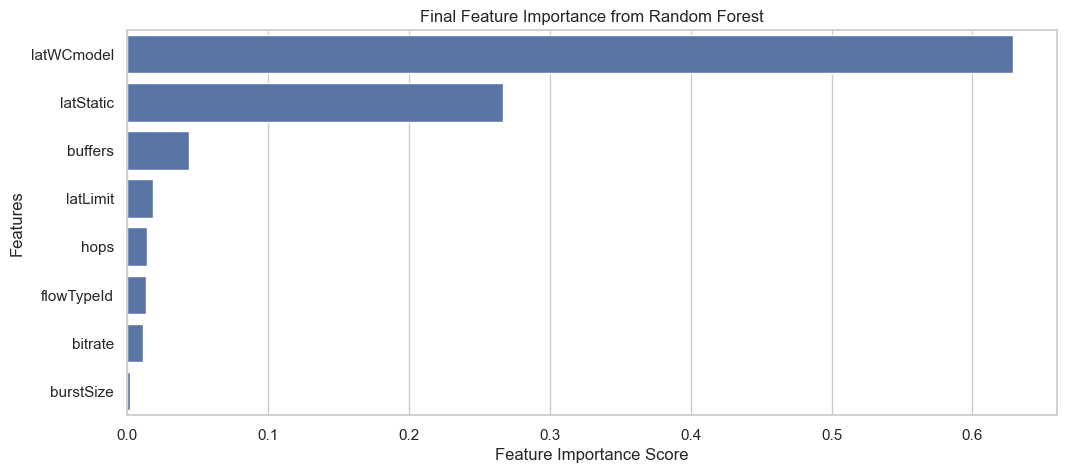

In [36]:
# RandomForestRegressor Importance

# train a Random Forest model to evaluate feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_filtered, y)

# feature importance scores
feature_importance = pd.Series(rf.feature_importances_, index=df_filtered.columns).sort_values(ascending=False)


plt.figure(figsize=(12, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Final Feature Importance from Random Forest")
plt.show()

In [37]:
#RFE whit RandomForestRegressor


rfe_model = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(rfe_model, n_features_to_select=6, step=1)  # keep only the top 6 features
selector = selector.fit(df_filtered, y)


selected_features = df_filtered.columns[selector.support_]
df_final = df_filtered[selected_features].copy()

print("\n Top Features Selected by RFE with RF Regressor:")
print(selected_features.to_list())
print("Final shape:", df_final.shape)


 Top Features Selected by RFE with RF Regressor:
['flowTypeId', 'latLimit', 'hops', 'buffers', 'latStatic', 'latWCmodel']
Final shape: (43200, 6)


In [38]:
#RFE whit LogisticRegression


lr_rfe = LogisticRegression(random_state=42, max_iter=1000)
rfe_selector = RFE(estimator=lr_rfe, n_features_to_select=6, step=1)
rfe_selector.fit(df_filtered, y)

selected_mask = rfe_selector.support_
selected_features = df_filtered.columns[selected_mask]
df_final = df_filtered[selected_features].copy()

print("Top Features Selected by RFE with LR:")
print( selected_features.tolist())
print("Final shape:", df_final.shape)


Top Features Selected by RFE with LR:
['flowTypeId', 'bitrate', 'hops', 'buffers', 'latStatic', 'latWCmodel']
Final shape: (43200, 6)


In [39]:
features_to_drop = ["latStatic"]
df_filtered = df_filtered.drop(columns=features_to_drop)

print(df_filtered.columns.tolist())

['flowTypeId', 'bitrate', 'burstSize', 'latLimit', 'hops', 'buffers', 'latWCmodel']


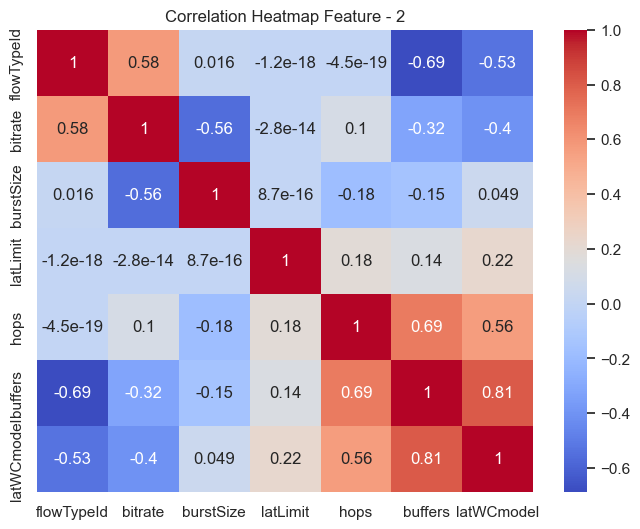

In [40]:
# Feature Correlation Heatmap 2

corr_matrix = df_filtered.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Feature - 2")
plt.show()

In [41]:
#VIF 2 

df_num = df_filtered.select_dtypes(include=["float","int"]).copy()
df_num["Intercept"] = 1

vif_values = []
for i in range(df_num.shape[1]):
    vif = variance_inflation_factor(df_num.values, i)
    vif_values.append((df_num.columns[i], vif))

# column with VIF>10 must be dropped
for col,vifval in vif_values:
    print(col, vifval)

flowTypeId 11.60082855890694
bitrate 3.0248194426309514
burstSize 1.9883611684053941
latLimit 1.0778636349269126
hops 10.494037013180657
buffers 23.27592145352265
latWCmodel 3.3873606513441517
Intercept 62560.12806128641


In [42]:
features_to_drop = ["buffers"]
df_filtered = df_filtered.drop(columns=features_to_drop)

print(df_filtered.columns.tolist())

['flowTypeId', 'bitrate', 'burstSize', 'latLimit', 'hops', 'latWCmodel']


In [43]:
#VIF 3 

df_num = df_filtered.select_dtypes(include=["float","int"]).copy()
df_num["Intercept"] = 1

vif_values = []
for i in range(df_num.shape[1]):
    vif = variance_inflation_factor(df_num.values, i)
    vif_values.append((df_num.columns[i], vif))

# column with VIF>10 must be dropped
for col,vifval in vif_values:
    print(col, vifval)

flowTypeId 2.5258172976237034
bitrate 3.0068062732628844
burstSize 1.9794806313308284
latLimit 1.0766488301998944
hops 2.010383658892841
latWCmodel 2.8891035289164457
Intercept 62021.4186413684


In [44]:
print("Final Features for Training:")
print(df_filtered.columns.tolist())

Final Features for Training:
['flowTypeId', 'bitrate', 'burstSize', 'latLimit', 'hops', 'latWCmodel']


In [45]:
df_filtered.to_csv("dataset/RING_data_final.csv", index=False)
print("Final dataset saved successfully")

Final dataset saved successfully


In [46]:
# RELOAD TO SAVE EVERYTHING

# new cleaned dataset
X = pd.read_csv("dataset/RING_data_final.csv")

# target variable y from the original dataset (bk)
df_original["latClass"] = (df_original["latOverallSim"] > 100).astype(int)
mask_fh = df_original["flowName"].isin(["FH_UL", "FH_DL"])
y = df_original.loc[mask_fh, "latClass"].reset_index(drop=True)

print("Features (X) successfully loaded!")
print(X.head())


print("Target Variable (y) successfully loaded!")
print(y.head())


Features (X) successfully loaded!
   flowTypeId  bitrate  burstSize  latLimit  hops  latWCmodel
0           0   22.598         61       111     3     18.7820
1           1   22.968         62       111     3      8.7586
2           0   22.598         61        64     2      9.7763
3           1   22.968         62        64     2      0.0000
4           0   22.598         61       146     2      6.0138
Target Variable (y) successfully loaded!
0    0
1    0
2    0
3    0
4    0
Name: latClass, dtype: int32


In [47]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (43200, 6)
y shape: (43200,)


In [48]:
# 60/20/20 split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, 
    y, 
    test_size=0.4, 
    random_state=42,
    stratify=y
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

In [94]:
joblib.dump(scaler, "ring_scaler.joblib")
print("Ring scaler has been saved to ring_scaler.joblib.")

Ring scaler has been saved to ring_scaler.joblib.


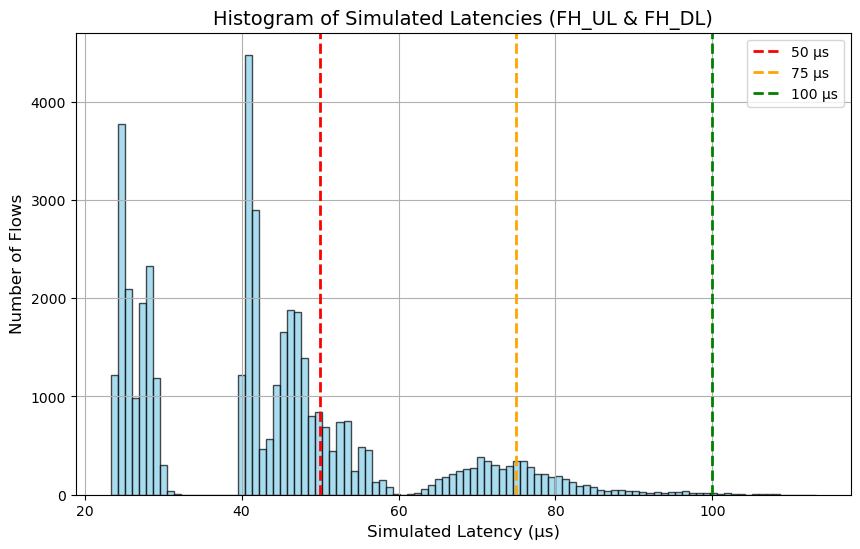

In [9]:
# for section 3.5 of the report

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset/RING_data_backup.csv")

# Filter only FH_UL and FH_DL flows
mask_fh = df["flowName"].isin(["FH_UL", "FH_DL"])
df = df[mask_fh].copy()  # Avoid SettingWithCopyWarning

# Check if the latency column exists and is numeric
if "latOverallSim" not in df.columns:
    raise ValueError("Column 'latOverallSim' not found in dataset.")
if not pd.api.types.is_numeric_dtype(df["latOverallSim"]):
    raise ValueError("'latOverallSim' must be numeric.")

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df["latOverallSim"], bins=100, color="skyblue", edgecolor="black", alpha=0.7)

# Add SLA threshold lines
for threshold, color in zip([50, 75, 100], ["red", "orange", "green"]):
    plt.axvline(threshold, color=color, linestyle="--", linewidth=2, label=f"{threshold} µs")

# Labels and formatting
plt.title("Histogram of Simulated Latencies (FH_UL & FH_DL)", fontsize=14)
plt.xlabel("Simulated Latency (µs)", fontsize=12)
plt.ylabel("Number of Flows", fontsize=12)
plt.legend()
plt.grid(True)



---

## Logistic Regression

In [45]:
#Logistic Regression 


# train the LR
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Evaluate at threshold = 0.5 on validation
y_pred_val_05 = lr_model.predict(X_valid_scaled)
val_acc_05 = accuracy_score(y_valid, y_pred_val_05)
print("Value acc at 0.5 threshold:", val_acc_05)

# Probability + cost-based threshold - on validation
probs_val = lr_model.predict_proba(X_valid_scaled)[:,1]
thresholds = np.linspace(0,1,50)
best_thr, best_cost = None, float("inf")

for thr in thresholds:
    y_pred_thr = (probs_val >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_thr).ravel()
    cost = fp + 5*fn
    if cost<best_cost:
        best_cost=cost
        best_thr=thr

print(f"\nBest threshold on validation set: {best_thr:.3f}, Cost = {best_cost}")

probs_test = lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_test = (probs_test >= best_thr).astype(int)

# cm
cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Test set):")
print(cm)

print("\nClassification Report (Test set):")
print(classification_report(y_test, y_pred_test))

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy - Best Threshold: {accuracy:.4f}")

# cost on test set
tn, fp, fn, tp = cm.ravel()
test_cost = fp + 5 * fn
print(f"Test Cost (FP + 5*FN): {test_cost}")


Value acc at 0.5 threshold: 0.9988425925925926

Best threshold on validation set: 0.306, Cost = 22

Confusion Matrix (Test set):
[[8617    5]
 [   1   17]]

Classification Report (Test set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8622
           1       0.77      0.94      0.85        18

    accuracy                           1.00      8640
   macro avg       0.89      0.97      0.92      8640
weighted avg       1.00      1.00      1.00      8640

Test Accuracy - Best Threshold: 0.9993
Test Cost (FP + 5*FN): 10


In [46]:
# Cross-Validation Test

lr_cv_model = LogisticRegression(random_state=42, max_iter=1000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    lr_cv_model, 
    X_train_scaled, 
    y_train, 
    cv=cv, 
    scoring="accuracy"
)

print("\nCross validation accuracy scores (5 fold):", cv_scores)
print(f"Mean accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross validation accuracy scores (5 fold): [0.9992284  0.9996142  0.99903549 0.9994213  0.99884259]
Mean accuracy: 0.9992 ± 0.0003


In [130]:
# original scaled test set
X_test_noisy = X_test_scaled.copy()

# small Gaussian noise 1% 
noise = np.random.normal(loc=0.0, scale=0.05, size=X_test_noisy.shape)
X_test_noisy += noise

# predict noisy data using the trained model and best threshold
probs_noisy = lr_model.predict_proba(X_test_noisy)[:, 1]
y_pred_noisy = (probs_noisy >= best_thr).astype(int)

# result performance drop
print("Accuracy on noisy test set:", accuracy_score(y_test, y_pred_noisy))

# check drop in cost
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_noisy).ravel()
cost_noisy = fp + 5 * fn
print(f"Cost on noisy test set (FP + 5*FN): {cost_noisy}")


Accuracy on noisy test set: 0.9991898148148148
Cost on noisy test set (FP + 5*FN): 15


In [58]:
import joblib

# save the final LR model object
joblib.dump(lr_model, "logreg_ring_model.joblib")
print("LR model saved")

best_threshold_info = {
    "threshold": best_thr,
    "costFN": 5,
    "costFP": 1
}

joblib.dump(best_threshold_info, "logreg_ring_best_threshold_info.joblib")
print("best threshold info saved")


LR model saved
best threshold info saved


---

## Random Forest

In [62]:
# CROSS-VALIDATION + HYPERPARAMETER TUNING ON TRAIN SPLIT 60%


# param grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

rf_base = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,                # 5 fold CV on the x_train
    scoring='accuracy',
    n_jobs=-1,          
    verbose=2
)

print("Starting RF hyperparameter tuning on the 60% training set: ")
grid_search.fit(X_train, y_train)

print("\nBest hyperparameters from CV:", grid_search.best_params_)
print("Mean CV Accuracy on TRAIN folds:", grid_search.best_score_)

# this is re fitted on the entire X_train
best_rf = grid_search.best_estimator_


Starting RF hyperparameter tuning on the 60% training set: 
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameters from CV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean CV Accuracy on TRAIN folds: 0.9997299382716051



Best RF on Validation w threshold 0.5
Val Accuracy: 0.9990
Confusion Matrix:
[[8618    4]
 [   5   13]]

Best threshold on validation by cost=0.020, cost=16


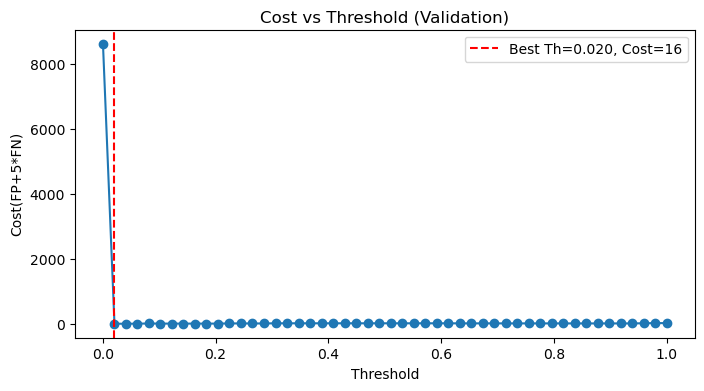

In [64]:
# EVALUATE BEST RF ON VALIDATION THRESHOLD 0.5 + tune the threshold

y_pred_valid_05 = best_rf.predict(X_valid)
acc_valid_05 = accuracy_score(y_valid, y_pred_valid_05)
print("\nBest RF on Validation w threshold 0.5")
print(f"Val Accuracy: {acc_valid_05:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid_05))

# prob + cost-based threshold
import matplotlib.pyplot as plt

probs_valid = best_rf.predict_proba(X_valid)[:,1]
thresholds = np.linspace(0,1,50)
costFN, costFP = 5.0, 1.0

best_thr_val = None
best_cost_val = float("inf")
cost_curve_val = []

for thr in thresholds:
    y_pred_thr = (probs_valid >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_thr).ravel()
    cost = fp + 5*fn
    cost_curve_val.append(cost)
    if cost < best_cost_val:
        best_cost_val = cost
        best_thr_val = thr

print(f"\nBest threshold on validation by cost={best_thr_val:.3f}, cost={best_cost_val}")

plt.figure(figsize=(8,4))
plt.plot(thresholds, cost_curve_val, marker='o')
plt.axvline(best_thr_val, color='r', linestyle='--',
            label=f'Best Th={best_thr_val:.3f}, Cost={best_cost_val}')
plt.title("Cost vs Threshold (Validation)")
plt.xlabel("Threshold")
plt.ylabel("Cost(FP+5*FN)")
plt.legend()
plt.show()

In [73]:
# evaluate at threshold=0.5
y_pred_test_05 = best_rf.predict(X_test)
acc_test_05 = accuracy_score(y_test, y_pred_test_05)
print("\nTest set threshold 0.5")
print(f"Accuracy: {acc_test_05:.4f}")
print("Confusion Matrix:", "\n",confusion_matrix(y_test, y_pred_test_05))

# evaluate at best_thr_val
probs_test = best_rf.predict_proba(X_test)[:,1]
y_pred_test_thr = (probs_test >= best_thr_val).astype(int)

acc_test_thr = accuracy_score(y_test, y_pred_test_thr)
cm_test_thr = confusion_matrix(y_test, y_pred_test_thr)
tn, fp, fn, tp = cm_test_thr.ravel()
test_cost = fp + 5*fn

print(f"\nTest set threshold {best_thr_val:.3f}")
print(f"Accuracy: {acc_test_thr:.4f}")
print("Confusion Matrix:","\n", cm_test_thr)
print(f"Cost(FP+5*FN): {test_cost}")



Test set threshold 0.5
Accuracy: 0.9998
Confusion Matrix: 
 [[8622    0]
 [   2   16]]

Test set threshold 0.020
Accuracy: 0.9997
Confusion Matrix: 
 [[8619    3]
 [   0   18]]
Cost(FP+5*FN): 3


In [ ]:
# NOISE INJECTION

def add_noise(X, noise_factor=0.1, random_state=42):
    rng = np.random.RandomState(random_state)
    X_noisy = X.copy()
    
    for col in X_noisy.columns:
        std_col = X_noisy[col].std()
        noise = rng.normal(loc=0.0, scale=noise_factor * std_col, size=len(X_noisy))
        X_noisy[col] += noise
    
    return X_noisy

# create a noisy version of X_train
X_train_noisy = add_noise(X_train, noise_factor=0.1, random_state=42)

# retrain best RF on the noisy training data
best_rf.fit(X_train_noisy, y_train)

# evaluate performance on the validation and test sets at threshold=0.5
y_pred_valid_noisy = best_rf.predict(X_valid)
acc_valid_noisy = accuracy_score(y_valid, y_pred_valid_noisy)
print(f"Validation Accuracy (Noisy Train, thr=0.5): {acc_valid_noisy:.4f}")
print("Validation Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid_noisy))

y_pred_test_noisy = best_rf.predict(X_test)
acc_test_noisy = accuracy_score(y_test, y_pred_test_noisy)
print(f"\nTest Accuracy (Noisy Train, thr=0.5): {acc_test_noisy:.4f}")
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_noisy))


Validation Accuracy (Noisy Train, thr=0.5): 0.9990
Validation Confusion Matrix:
[[8619    3]
 [   6   12]]

Test Accuracy (Noisy Train, thr=0.5): 0.9994
Test Confusion Matrix:
[[8622    0]
 [   5   13]]


In [75]:
# SAVE FINAL MODEL & THRESHOLD
import joblib

joblib.dump(best_rf, "best_rf_ring_model.joblib")
print("Random Forest model saved")

threshold_info_rf = {"threshold": best_thr_val, "costFN":5.0, "costFP":1.0}
joblib.dump(threshold_info_rf, "best_rf_ring_threshold_info.joblib")
print("Best threshold info saved")



Random Forest model saved
Best threshold info saved


---

## Neural Network

In [80]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras



2.10.0


In [81]:
# the neural network definition
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(32, activation="relu"),  # Hidden Layer 1
    keras.layers.Dense(16, activation="relu"),  # Hidden Layer 2
    keras.layers.Dense(1, activation="sigmoid")  # Output Layer -> Binary Classification
])

# the model compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# train the model
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,  
    batch_size=32, 
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[early_stopping]
)

Epoch 1/50
810/810 [==============================] - 2s 1ms/step - loss: 0.0269 - accuracy: 0.9950 - val_loss: 0.0032 - val_accuracy: 0.9985
Epoch 2/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0051 - val_accuracy: 0.9975
Epoch 3/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.9985
Epoch 4/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0026 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9985
Epoch 5/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9991
Epoch 6/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 7/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9987
Epoch 

In [82]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

probs_mlp = model.predict(X_test_scaled).ravel()
thresholds = np.linspace(0, 1, 50)
best_threshold = None
best_cost = float("inf")

for thr in thresholds:
    y_pred_thr = (probs_mlp >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thr).ravel()
    cost = fp + 5*fn
    if cost < best_cost:
        best_cost = cost
        best_threshold = thr

print(f"Best threshold: {best_threshold:.3f}, Cost={best_cost}")


270/270 [==============================] - 0s 686us/step
[[8622    0]
 [   3   15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8622
           1       1.00      0.83      0.91        18

    accuracy                           1.00      8640
   macro avg       1.00      0.92      0.95      8640
weighted avg       1.00      1.00      1.00      8640

Final Test Accuracy: 0.9996527777777777
270/270 [==============================] - 0s 652us/step
Best threshold: 0.204, Cost=4


In [ ]:
# evaluate MLP on validation set at threshold 0.5
val_probs = model.predict(X_valid_scaled).ravel()
y_pred_val_05 = (val_probs >= 0.5).astype(int)

acc_val_05 = accuracy_score(y_valid, y_pred_val_05)
tn_05, fp_05, fn_05, tp_05 = confusion_matrix(y_valid, y_pred_val_05).ravel()
cost_05 = fp_05 + 5*fn_05

print("\nMLP on Validation threshold=0.5")
print(f"Accuracy: {acc_val_05:.4f}, Cost(FP+5*FN): {cost_05}")
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_val_05))

# cost based threshold sweep on validation
thresholds = np.linspace(0, 1, 50)
best_thresh = None
best_cost_val = float("inf")

for thr in thresholds:
    y_pred_thr = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred_thr).ravel()
    cost = fp + 5*fn
    if cost < best_cost_val:
        best_cost_val = cost
        best_thresh = thr

print(f"\nBest threshold on Validation by cost= {best_thresh:.3f}, Cost={best_cost_val}")

#  final evaluation on test set with best_thresh
test_probs = model.predict(X_test_scaled).ravel()
y_pred_test_thr = (test_probs >= best_thresh).astype(int)

acc_test_thr = accuracy_score(y_test, y_pred_test_thr)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test_thr).ravel()
test_cost = fp_test + 5*fn_test

print(f"\nMLP on Test set threshold={best_thresh:.3f}")
print(f"Accuracy: {acc_test_thr:.4f}, Cost(FP+5*FN): {test_cost}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_thr))
print("Classification Report:")
print(classification_report(y_test, y_pred_test_thr))


270/270 [==============================] - 0s 814us/step

MLP on Validation threshold=0.5
Accuracy: 0.9991, Cost(FP+5xFN): 24
Confusion Matrix:
[[8618    4]
 [   4   14]]

Best threshold on Validation by cost= 0.265, Cost=17
270/270 [==============================] - 0s 1ms/step

MLP on Test set threshold=0.265
Accuracy: 0.9997, Cost(FP+5*FN): 7
Confusion Matrix:
[[8620    2]
 [   1   17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8622
           1       0.89      0.94      0.92        18

    accuracy                           1.00      8640
   macro avg       0.95      0.97      0.96      8640
weighted avg       1.00      1.00      1.00      8640



In [ ]:
# Cross-validation 

from sklearn.model_selection import StratifiedKFold

def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_idx, valid_idx in skf.split(X_train_scaled, y_train):
    model_cv = create_model()
    model_cv.fit(X_train_scaled[train_idx], y_train.iloc[train_idx].values, epochs=10, verbose=0)
    val_probs = model_cv.predict(X_train_scaled[valid_idx]).ravel()
    val_preds = (val_probs>=0.5).astype(int)
    fold_acc = accuracy_score(y_train.iloc[valid_idx].values, val_preds)
    fold_accuracies.append(fold_acc)

print("CV accuracies:", fold_accuracies)

162/162 [==============================] - 0s 702us/step
CV accuracies: [0.9994212962962963, 0.9994212962962963, 0.9990354938271605, 0.9996141975308642, 0.9998070987654321]


In [84]:
# Model Stability Test - Noise Injection

import numpy as np

def add_noise(X, noise_factor=0.01):
    X_noisy = X.copy()
    for i in range(X.shape[1]):
        col_std = X_noisy[:, i].std()
        noise = np.random.normal(0, noise_factor * col_std, size=len(X_noisy))
        X_noisy[:, i] += noise
    return X_noisy

# adding noise to the test set
X_test_noisy = add_noise(X_test_scaled, noise_factor=0.01)

# prediction
y_pred_noisy_prob = model.predict(X_test_noisy).ravel()
y_pred_noisy = (y_pred_noisy_prob >= 0.5).astype(int)

from sklearn.metrics import accuracy_score
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy on noisy test data: {accuracy_noisy:.4f}")


270/270 [==============================] - 0s 639us/step
Accuracy on noisy test data: 0.9997


In [87]:
model.save("mlp_ring_model.h5")
joblib.dump({"threshold": best_threshold, "costFN":5, "costFP":1}, "mlp_ring_threshold_info.joblib")

print("MLP saved")


MLP saved


---

## Comparison between models and benchmark 

                  Model  Accuracy  Best Threshold  Test Cost (FP + 5*FN)  \
0   Logistic Regression    0.9993           0.306                     10   
1         Random Forest    0.9997           0.020                      3   
2  Neural Network (MLP)    0.9997           0.265                      7   

  Noise Stable  
0          yes  
1          yes  
2          yes  


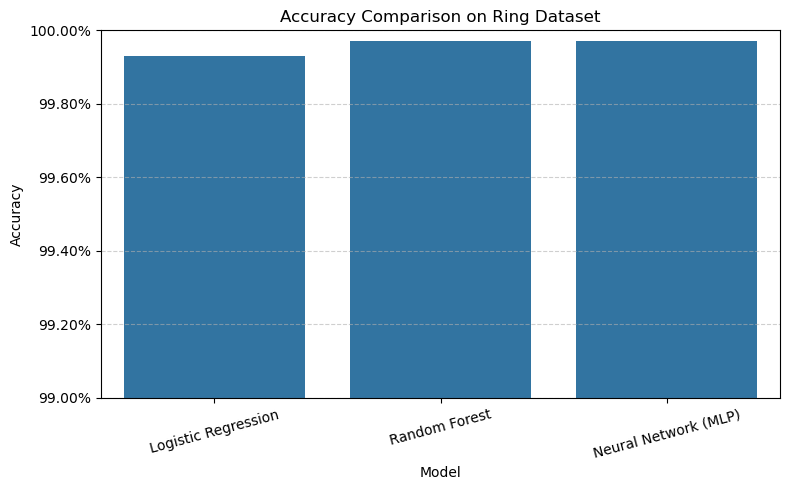

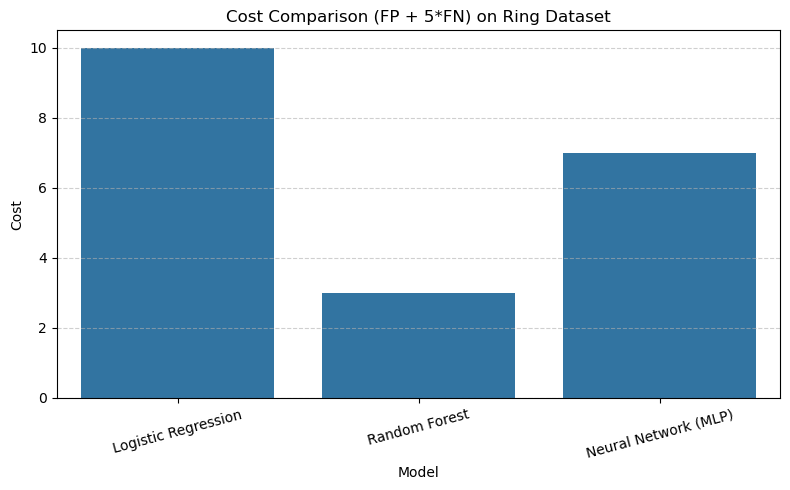

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


models = ["Logistic Regression", "Random Forest", "Neural Network (MLP)"]
accuracies = [0.9993, 0.9997, 0.9997]  
thresholds = [0.306, 0.02, 0.265]
costs = [10, 3, 7]
noise_stable = ["yes", "yes", "yes"] 

results_data = {
    "Model": models,
    "Accuracy": accuracies,
    "Best Threshold": thresholds,
    "Test Cost (FP + 5*FN)": costs,
    "Noise Stable": noise_stable
}

df_compare = pd.DataFrame(results_data)
print(df_compare)

# bar chart of acc
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=df_compare)
plt.title("Accuracy Comparison on Ring Dataset")
plt.ylim(0.99, 1.0)
plt.ylabel("Accuracy")
plt.xticks(rotation=15)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot bar chart of Test Cost
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Test Cost (FP + 5*FN)", data=df_compare)
plt.title("Cost Comparison (FP + 5*FN) on Ring Dataset")
plt.ylabel("Cost")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


---

## Mesh Data Set - No training

In [92]:
# LOAD MESH DATASET

# load dataset 
df_mesh_original = pd.read_csv("dataset/MESH_data_backup.txt", sep="\t")
print("\nFirst 5 rows of MESH data file:")
print(df_mesh_original.head())

mask_fh = df_mesh_original["flowName"].isin(["FH_UL","FH_DL"])
df_mesh_filtered = df_mesh_original.loc[mask_fh].copy()
print(f"\nFiltered mesh data for FH_UL/FH_DL: {df_mesh_filtered.shape[0]} flows")


selected_features = ["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]

X_mesh = df_mesh_filtered[selected_features].copy()

# actual class
df_mesh_filtered["latClass"] = (df_mesh_filtered["latOverallSim"] > 100).astype(int)
y_mesh = df_mesh_filtered["latClass"]

print("\nMesh dataset (FH flows) processed!")
print("X_mesh shape:", X_mesh.shape, "y_mesh shape:", y_mesh.shape)
print("First 5 rows of X_mesh:")
print(X_mesh.head())
print("\nClass Distribution in y_mesh:")
print(y_mesh.value_counts())



First 5 rows of MESH data file:
   id      netName  brVariability flowName  flowTypeId  priority  trWindow  \
0   0  MESH20_RU10              0    FH_UL           0         2  0.000033   
1   1  MESH20_RU10              0    MH_UL           2         0  0.000033   
2   2  MESH20_RU10              0    FH_DL           1         2  0.000033   
3   3  MESH20_RU10              0    MH_DL           3         0  0.000033   
4   4  MESH20_RU10              0    FH_UL           0         2  0.000033   

   bitrate  burstSize  latLimit  ...  latEPotherINsum  latLPsum  latOverallWC  \
0  22.5980         61       111  ...           5.6437   1.85040        73.455   
1   3.3340          9      1000  ...           0.0000   0.00000       103.190   
2  22.9680         62       111  ...           0.0000   1.11020        67.719   
3   4.4454         12      1000  ...           0.0000   0.00000       112.540   
4  22.5980         61        57  ...           0.0000   0.37008        42.231   

   latOvera

In [107]:

scaler = joblib.load("ring_scaler.joblib")
print("\nRing scaler loaded.")






Ring scaler loaded.


In [111]:
# Mesh LR

# logistic regression model
logreg_loaded = joblib.load("logreg_ring_model.joblib")
print("Loaded Logistic Regression model.")

# load best threshold info
threshold_info_lr = joblib.load("logreg_ring_best_threshold_info.joblib")
lr_best_threshold = threshold_info_lr["threshold"]
costFN = threshold_info_lr.get("costFN", 5)
costFP = threshold_info_lr.get("costFP", 1)
print(f"LR best threshold from ring: {lr_best_threshold:.3f} (costFN={costFN}, costFP={costFP})")

X_mesh_scaled = scaler.transform(X_mesh)

probs_lr_mesh = logreg_loaded.predict_proba(X_mesh_scaled)[:, 1]
y_pred_lr_mesh = (probs_lr_mesh >= lr_best_threshold).astype(int)

# Results
tn, fp_lr, fn_lr, tp = confusion_matrix(y_mesh, y_pred_lr_mesh).ravel()
acc_lr_mesh = accuracy_score(y_mesh, y_pred_lr_mesh)
cost = fp_lr + 5*fn_lr
print(f"Accuracy: {acc_lr_mesh:.4f}, Cost={cost}")
print(confusion_matrix(y_mesh, y_pred_lr_mesh))
print(classification_report(y_mesh, y_pred_lr_mesh))

Loaded Logistic Regression model.
LR best threshold from ring: 0.306 (costFN=5, costFP=1)
Accuracy: 0.9906, Cost=635
[[42407   350]
 [   57   386]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     42757
           1       0.52      0.87      0.65       443

    accuracy                           0.99     43200
   macro avg       0.76      0.93      0.83     43200
weighted avg       0.99      0.99      0.99     43200



In [ ]:
# Mesh RF


# the random forest load
best_rf_loaded = joblib.load("best_rf_ring_model.joblib")
print("Loaded Random Forest model.")

# the best threshold info load
threshold_info_rf = joblib.load("best_rf_ring_threshold_info.joblib")
rf_best_threshold = threshold_info_rf["threshold"]
costFN = threshold_info_rf.get("costFN", 5)
costFP = threshold_info_rf.get("costFP", 1)
print(f"RF best threshold from ring: {rf_best_threshold:.3f} (costFN={costFN}, costFP={costFP})")


probs_rf_mesh = best_rf_loaded.predict_proba(X_mesh_scaled)[:, 1]

y_pred_rf_mesh = (probs_rf_mesh >= rf_best_threshold).astype(int)

tn, fp_rf, fn_rf, tp_rf = confusion_matrix(y_mesh, y_pred_rf_mesh).ravel()
acc_rf_mesh = accuracy_score(y_mesh, y_pred_rf_mesh)
rf_cost_mesh = fp_rf * costFP + fn_rf * costFN

print("\nRandom Forest (Ring->Mesh)")
print(f"TN={tn}, FP={fp_rf}, FN={fn_rf}, TP={tp_rf}")
print(f"Accuracy: {acc_rf_mesh:.4f}")
print("Classification Report:")
print(classification_report(y_mesh, y_pred_rf_mesh))

print(f"Cost (FP + 5*FN): {rf_cost_mesh}")


Loaded Random Forest model.
RF best threshold from ring: 0.020 (costFN=5.0, costFP=1.0)

Random Forest (Ring->Mesh)
TN=42020, FP=737, FN=324, TP=119
Accuracy: 0.9754
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     42757
           1       0.14      0.27      0.18       443

    accuracy                           0.98     43200
   macro avg       0.57      0.63      0.59     43200
weighted avg       0.98      0.98      0.98     43200

Cost (FP + 5×FN): 2357.0


c:\Users\Raul\anaconda3\envs\neural_cv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [115]:
# Mesh MLP

# nn model
mlp_loaded = keras.models.load_model("mlp_ring_model.h5")
print("Loaded MLP model.")

# best threshold info load
threshold_info_mlp = joblib.load("mlp_ring_threshold_info.joblib")
mlp_best_threshold = threshold_info_mlp["threshold"]
print(f"MLP best threshold from ring: {mlp_best_threshold:.3f}")

# predict probabilities on MESH
probs_mlp_mesh = mlp_loaded.predict(X_mesh_scaled).ravel()

# convert to 0/1
y_pred_mlp_mesh = (probs_mlp_mesh >= mlp_best_threshold).astype(int)

# Results
tn, fp_mlp, fn_mlp, tp = confusion_matrix(y_mesh, y_pred_mlp_mesh).ravel()
acc_mlp_mesh = accuracy_score(y_mesh, y_pred_mlp_mesh)
mlp_cost_mesh = fp_mlp + 5*fn_mlp

print("\nMLP (Ring->Mesh)")
print(f"TN={tn}, FP={fp_mlp}, FN={fn_mlp}, TP={tp}")
print(f"Accuracy: {acc_mlp_mesh:.4f}")
print("Classification Report:")
print(classification_report(y_mesh, y_pred_mlp_mesh))
print(f"Cost (FP + 5*FN): {mlp_cost_mesh}")


Loaded MLP model.
MLP best threshold from ring: 0.204
1350/1350 [==============================] - 1s 703us/step

MLP (Ring->Mesh)
TN=42465, FP=292, FN=139, TP=304
Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42757
           1       0.51      0.69      0.59       443

    accuracy                           0.99     43200
   macro avg       0.75      0.84      0.79     43200
weighted avg       0.99      0.99      0.99     43200

Cost (FP + 5*FN): 987


In [112]:
comparison_mesh = [
    {"Model": "Logistic Regression", "Accuracy": acc_lr_mesh, 
     "FP": fp_lr, "FN": fn_lr, "Cost": fp_lr + 5*fn_lr},
    {"Model": "Random Forest", "Accuracy": acc_rf_mesh, 
     "FP": fp_rf, "FN": fn_rf, "Cost": fp_rf + 5*fn_rf},
    {"Model": "MLP", "Accuracy": acc_mlp_mesh, 
     "FP": fp_mlp, "FN": fn_mlp, "Cost": fp_mlp + 5*fn_mlp},
]

df_compare_mesh = pd.DataFrame(comparison_mesh)
print(df_compare_mesh)


                 Model  Accuracy   FP   FN  Cost
0  Logistic Regression  0.990579  350   57   635
1        Random Forest  0.975440  737  324  2357
2                  MLP  0.990023  292  139   987


---

## Mesh Training - LR 

In [10]:
df_mesh_original = pd.read_csv("dataset/MESH_data_backup.txt", sep="\t")

mask_fh = df_mesh_original["flowName"].isin(["FH_UL", "FH_DL"])
df_mesh_filtered = df_mesh_original.loc[mask_fh].copy()

selected_features = ["flowTypeId", "bitrate", "burstSize", "latLimit", "hops", "latWCmodel"]

df_mesh_final = df_mesh_filtered.copy()

df_mesh_final["latClass"] = (df_mesh_final["latOverallSim"] > 100).astype(int)

X_mesh_final = df_mesh_final[selected_features]
y_mesh_final = df_mesh_final["latClass"]

print("X_mesh_final shape:", X_mesh_final.shape)
print("y_mesh_final shape:", y_mesh_final.shape)

X_mesh_final shape: (43200, 6)
y_mesh_final shape: (43200,)


In [9]:
# from sklearn.model_selection import train_test_split
X_train_mesh, X_temp_mesh, y_train_mesh, y_temp_mesh = train_test_split(
    X_mesh_final,
    y_mesh_final,
    test_size=0.4,
    random_state=42,
    stratify=y_mesh_final
)

X_valid_mesh, X_test_mesh, y_valid_mesh, y_test_mesh = train_test_split(
    X_temp_mesh,
    y_temp_mesh,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_mesh
)

print("Train:", X_train_mesh.shape, y_train_mesh.shape)
print("Valid:", X_valid_mesh.shape, y_valid_mesh.shape)
print("Test:",  X_test_mesh.shape,  y_test_mesh.shape)

Train: (25920, 6) (25920,)
Valid: (8640, 6) (8640,)
Test: (8640, 6) (8640,)


In [8]:
scaler_mesh = StandardScaler()
X_train_mesh_scaled = scaler_mesh.fit_transform(X_train_mesh)
X_valid_mesh_scaled = scaler_mesh.transform(X_valid_mesh)
X_test_mesh_scaled  = scaler_mesh.transform(X_test_mesh)

In [ ]:
# LR on Mesh

mesh_lr = LogisticRegression(random_state=42, max_iter=1000)
mesh_lr.fit(X_train_mesh_scaled, y_train_mesh)


val_probs_mesh = mesh_lr.predict_proba(X_valid_mesh_scaled)[:,1]
thresholds = np.linspace(0,1,50)
costFN, costFP = 5, 1

best_thr_mesh = None
best_cost_mesh_val = float("inf")

for thr in thresholds:
    val_preds_thr = (val_probs_mesh >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_valid_mesh, val_preds_thr).ravel()
    cost = fp + costFN*fn
    if cost < best_cost_mesh_val:
        best_cost_mesh_val = cost
        best_thr_mesh = thr

print(f"Best threshold on mesh validation = {best_thr_mesh:.3f}, cost={best_cost_mesh_val}")

Best threshold on mesh validation = 0.204, cost=80


In [123]:
test_probs_mesh = mesh_lr.predict_proba(X_test_mesh_scaled)[:,1]
test_preds_thr = (test_probs_mesh >= best_thr_mesh).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test_mesh, test_preds_thr).ravel()
acc_test_mesh = accuracy_score(y_test_mesh, test_preds_thr)
test_cost_mesh = fp + costFN*fn

print("\nMesh LR on Mesh Test")
print(f"Threshold={best_thr_mesh:.3f}, Accuracy={acc_test_mesh:.4f}, Cost={test_cost_mesh}")
print("Confusion Matrix:", (tn, fp, fn, tp))



Mesh LR on Mesh Test
Threshold=0.204, Accuracy=0.9921, Cost=112
Confusion Matrix: (8495, 57, 11, 77)


In [7]:
feature_corr_test = [
"flowTypeId", "bitrate", "burstSize", "latLimit", "hops", "latWCmodel"
]

# filter flows FH_UL / FH_DL
mask_fh = df_original["flowName"].isin(["FH_UL","FH_DL"])
df_test_corr = df_original.loc[mask_fh, feature_corr_test].copy()

corr_matrix_test = df_test_corr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_test, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'df_original' is not defined

In [128]:
# RF

from sklearn.preprocessing import StandardScaler
scaler_mesh_rf = StandardScaler()
X_train_mesh_scaled_rf = scaler_mesh_rf.fit_transform(X_train_mesh)
X_valid_mesh_scaled_rf = scaler_mesh_rf.transform(X_valid_mesh)
X_test_mesh_scaled_rf  = scaler_mesh_rf.transform(X_test_mesh)


# hyperparam tunning

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}
rf_mesh_base = RandomForestClassifier(random_state=42)

grid_search_mesh_rf = GridSearchCV(
    estimator=rf_mesh_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_mesh_rf.fit(X_train_mesh_scaled_rf, y_train_mesh)
best_rf_mesh = grid_search_mesh_rf.best_estimator_
print("Best mesh RF params:", grid_search_mesh_rf.best_params_)


# from sklearn.ensemble import RandomForestClassifier

# best_rf_mesh = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=None,
#     min_samples_leaf=1,
#     min_samples_split=2,
#     random_state=42
# )
# best_rf_mesh.fit(X_train_mesh_scaled_rf, y_train_mesh)


# COST BASED THRESHOLD ON VALIDATION

val_probs_mesh_rf = best_rf_mesh.predict_proba(X_valid_mesh_scaled_rf)[:,1]
thresholds = np.linspace(0,1,50)
costFN, costFP = 5, 1

best_thr_mesh_rf = None
best_cost_val_rf = float("inf")

for thr in thresholds:
    y_pred_thr = (val_probs_mesh_rf >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_valid_mesh, y_pred_thr).ravel()
    cost = fp + fn*costFN
    if cost < best_cost_val_rf:
        best_cost_val_rf = cost
        best_thr_mesh_rf = thr

print(f"Best threshold on mesh validation (RF)={best_thr_mesh_rf:.3f}, cost={best_cost_val_rf}")

# Results
test_probs_mesh_rf = best_rf_mesh.predict_proba(X_test_mesh_scaled_rf)[:,1]
y_pred_test_thr_rf = (test_probs_mesh_rf >= best_thr_mesh_rf).astype(int)

tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test_mesh, y_pred_test_thr_rf).ravel()
acc_test_mesh_rf = accuracy_score(y_test_mesh, y_pred_test_thr_rf)
test_cost_mesh_rf = fp_rf + fn_rf*costFN

print(f"\nRandom Forest on Mesh Test threshold={best_thr_mesh_rf:.3f}")
print(f"Accuracy: {acc_test_mesh_rf:.4f}, Cost(FP+5*N)={test_cost_mesh_rf}")
print("Confusion Matrix:", (tn_rf, fp_rf, fn_rf, tp_rf))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best mesh RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best threshold on mesh validation (RF)=0.184, cost=60

Random Forest on Mesh Test threshold=0.184
Accuracy: 0.9939, Cost(FP+5*N)=93
Confusion Matrix: (8509, 43, 10, 78)


In [ ]:
# Neural network - MLP

scaler_mesh_mlp = StandardScaler()
X_train_mesh_scaled_mlp = scaler_mesh_mlp.fit_transform(X_train_mesh)
X_valid_mesh_scaled_mlp = scaler_mesh_mlp.transform(X_valid_mesh)
X_test_mesh_scaled_mlp  = scaler_mesh_mlp.transform(X_test_mesh)

# MLP training

mesh_mlp = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train_mesh_scaled_mlp.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
mesh_mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history_mlp = mesh_mlp.fit(
    X_train_mesh_scaled_mlp, y_train_mesh,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_mesh_scaled_mlp, y_valid_mesh),
    callbacks=[early_stopping],
    verbose=1
)


# COST BASED THRESHOLD TUNING ON VALIDATION
val_probs_mesh_mlp = mesh_mlp.predict(X_valid_mesh_scaled_mlp).ravel()
thresholds = np.linspace(0, 1, 50)
costFN, costFP = 5, 1

best_thr_mesh_mlp = None
best_cost_val_mlp = float("inf")

for thr in thresholds:
    val_preds_thr = (val_probs_mesh_mlp >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_valid_mesh, val_preds_thr).ravel()
    cost = fp + costFN*fn
    if cost < best_cost_val_mlp:
        best_cost_val_mlp = cost
        best_thr_mesh_mlp = thr

print(f"Best threshold on mesh validation {best_thr_mesh_mlp:.3f}, cost={best_cost_val_mlp}")

# Results
test_probs_mesh_mlp = mesh_mlp.predict(X_test_mesh_scaled_mlp).ravel()
test_preds_thr_mlp = (test_probs_mesh_mlp >= best_thr_mesh_mlp).astype(int)

tn_mlp, fp_mlp, fn_mlp, tp_mlp = confusion_matrix(y_test_mesh, test_preds_thr_mlp).ravel()
acc_test_mesh_mlp = accuracy_score(y_test_mesh, test_preds_thr_mlp)
test_cost_mesh_mlp = fp_mlp + fn_mlp*costFN

print(f"\nMLP on Mesh Testthreshold={best_thr_mesh_mlp:.3f}")
print(f"Accuracy: {acc_test_mesh_mlp:.4f}, Cost(FP+5*FN)={test_cost_mesh_mlp}")
print("Confusion Matrix:", (tn_mlp, fp_mlp, fn_mlp, tp_mlp))



Epoch 1/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0481 - accuracy: 0.9882 - val_loss: 0.0142 - val_accuracy: 0.9937
Epoch 2/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0134 - accuracy: 0.9943 - val_loss: 0.0123 - val_accuracy: 0.9947
Epoch 3/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0129 - accuracy: 0.9945 - val_loss: 0.0127 - val_accuracy: 0.9950
Epoch 4/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0122 - accuracy: 0.9950 - val_loss: 0.0116 - val_accuracy: 0.9948
Epoch 5/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0118 - accuracy: 0.9949 - val_loss: 0.0134 - val_accuracy: 0.9951
Epoch 6/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0118 - accuracy: 0.9951 - val_loss: 0.0115 - val_accuracy: 0.9947
Epoch 7/50
810/810 [==============================] - 1s 1ms/step - loss: 0.0117 - accuracy: 0.9945 - val_loss: 0.0120 - val_accuracy: 0.9953
Epoch 

## NEW TESTS

### File prep

In [ ]:

DATA_DIR   = Path("dataset")
RING_BACK  = DATA_DIR / "RING_data_backup.csv"
OUT_DIR    = DATA_DIR / "variants"
OUT_DIR.mkdir(exist_ok=True)


df_ring       = pd.read_csv(RING_BACK)
mask_fh       = df_ring["flowName"].isin(["FH_UL", "FH_DL"])
df_ring_fh    = df_ring.loc[mask_fh].copy()
print(f"[INFO] Loaded Ring FH: {len(df_ring_fh):,} rows")


def save_variant(df, limit_us: int, tag: str = ""):
    var         = df.copy()
    var["latClass"] = (var["latOverallSim"] > limit_us).astype(int)
    name        = f"ring_FH_limit{limit_us}us.csv" if tag == "" else f"{tag}.csv"
    var.to_csv(OUT_DIR / name, index=False)
    print(f"   ✔ {name:30s} | positives={(var['latClass'].sum()):,}")


for limit in (75, 50):
    save_variant(df_ring_fh, limit)


for tw in sorted(df_ring_fh["trWindow"].unique()):
    sub = df_ring_fh[df_ring_fh["trWindow"] == tw]
    tag = f"ring_FH_trWindow{tw:g}"
    save_variant(sub, 100, tag)


[INFO] Loaded Ring FH: 43,200 rows
   ✔ ring_FH_limit75us.csv          | positives=2,736
   ✔ ring_FH_limit50us.csv          | positives=10,400
   ✔ ring_FH_trWindow1.67e-05.csv   | positives=6
   ✔ ring_FH_trWindow3.33e-05.csv   | positives=85


In [ ]:
path = "dataset/variants/ring_FH_limit75us.csv"
data = pd.read_csv(path)

X = data[["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]]
y = data["latClass"]

# split 60/20/20 exactly like before
from sklearn.model_selection import train_test_split
X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, y, test_size=0.4,
                                            random_state=42, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(X_tmp, y_tmp, test_size=0.5,
                                            random_state=42, stratify=y_tmp)

# scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_tr_s = sc.fit_transform(X_tr)
X_val_s = sc.transform(X_val)
X_te_s  = sc.transform(X_te)




In [ ]:


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)


lr75 = LogisticRegression(max_iter=1000,
                          random_state=42,
                          n_jobs=-1)
lr75.fit(X_tr_s, y_tr)


COST_FP = 1
COST_FN = 5
threshold_grid = np.linspace(0.0, 1.0, 101)   # 0.00 -> 1.00 in 0.01 steps

val_prob = lr75.predict_proba(X_val_s)[:, 1]

best_thr = None
best_cost = np.inf

for thr in threshold_grid:
    val_pred = (val_prob >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, val_pred).ravel()
    cost = COST_FP * fp + COST_FN * fn
    if cost < best_cost:
        best_cost = cost
        best_thr  = thr

print(f"[Validation]   best_thr = {best_thr:.3f}   min-cost = {best_cost}")


test_prob = lr75.predict_proba(X_te_s)[:, 1]
test_pred = (test_prob >= best_thr).astype(int)

tn, fp, fn, tp = confusion_matrix(y_te, test_pred).ravel()
acc          = accuracy_score(y_te, test_pred)
test_cost    = COST_FP * fp + COST_FN * fn

print("\n[Test-set results — LR @ 75 us]")
print(f"Threshold   : {best_thr:.3f}")
print(f"Accuracy    : {acc:.4f}")
print(f"Cost (1*FP + 5*FN): {test_cost}")
print(f"Confusion   : (TN={tn}, FP={fp}, FN={fn}, TP={tp})")
print("\nDetailed classification report:")
print(classification_report(y_te, test_pred, digits=4))

import joblib
joblib.dump(lr75,   "lr_ring75us_model.joblib")
joblib.dump(sc,     "ring75us_scaler.joblib")
joblib.dump({"threshold": best_thr,
             "costFP"   : COST_FP,
             "costFN"   : COST_FN},
            "lr_ring75us_threshold_info.joblib")
print("\n[INFO] Model, scaler and threshold info saved ✓")


[Validation]   best_thr = 0.160   min-cost = 181

[Test-set results — LR @ 75 µs]
Threshold   : 0.160
Accuracy    : 0.9866
Cost (1*FP + 5*FN): 168
Confusion   : (TN=7990, FP=103, FN=13, TP=534)

Detailed classification report:
              precision    recall  f1-score   support

           0     0.9984    0.9873    0.9928      8093
           1     0.8383    0.9762    0.9020       547

    accuracy                         0.9866      8640
   macro avg     0.9183    0.9818    0.9474      8640
weighted avg     0.9882    0.9866    0.9870      8640


[INFO] Model, scaler and threshold info saved ✓


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

limit_us      = 75
cost_FP, cost_FN = 1, 5
variant_path  = "dataset/variants/ring_FH_limit75us.csv"


df75 = pd.read_csv(variant_path)

y_true = df75["latClass"].values                  
y_wc   = (df75["latOverallWC"] > limit_us).astype(int)


tn, fp, fn, tp = confusion_matrix(y_true, y_wc).ravel()
cost_wc = fp * cost_FP + fn * cost_FN
acc_wc  = accuracy_score(y_true, y_wc)

print(f"[Worst-case @ {limit_us} us]")
print(f"Accuracy           : {acc_wc:.4f}")
print(f"Cost (1*FP + 5*FN) : {cost_wc}")
print(f"Confusion Matrix   : (TN={tn}, FP={fp}, FN={fn}, TP={tp})\n")
print("Detailed report:\n", classification_report(y_true, y_wc, digits=4))


[Worst-case @ 75 µs]
Accuracy           : 0.9741
Cost (1*FP + 5*FN) : 1120
Confusion Matrix   : (TN=39344, FP=1120, FN=0, TP=2736)

Detailed report:
               precision    recall  f1-score   support

           0     1.0000    0.9723    0.9860     40464
           1     0.7095    1.0000    0.8301      2736

    accuracy                         0.9741     43200
   macro avg     0.8548    0.9862    0.9080     43200
weighted avg     0.9816    0.9741    0.9761     43200



### Test 1 - RECAP and BASELINE COMPARISON (Ring – 100 us)

In [ ]:

import pandas as pd, numpy as np, joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow import keras          # only for the MLP


ring_path = "dataset/RING_data_backup.csv"         # adjust if the name differs
df = pd.read_csv(ring_path)

mask_fh = df["flowName"].isin(["FH_UL", "FH_DL"])
df      = df.loc[mask_fh].reset_index(drop=True)

df["latClass"] = (df["latOverallSim"] > 100).astype(int)

feat_cols = ["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]
X = df[feat_cols].copy()
y = df["latClass"]


X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=42, stratify=y)

X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)

print("Test-set shape :", X_te.shape)


#  Worst-Case baseline (same test rows)

wc_pred = (df.loc[X_te.index, "latOverallWC"] > 100).astype(int).values
tn, fp, fn, tp = confusion_matrix(y_te, wc_pred).ravel()
wc_cost = fp + 5*fn
print("\n[Worst-Case @100 us]")
print(f"Accuracy : {accuracy_score(y_te, wc_pred):.4f}")
print(f"Cost     : {wc_cost}")
print("CM       :", (tn, fp, fn, tp))


# scaler + models + thresholds

scaler   = joblib.load("ring_scaler.joblib")

lr       = joblib.load("logreg_ring_model.joblib")
lr_thr   = joblib.load("logreg_ring_best_threshold_info.joblib")["threshold"]

rf       = joblib.load("best_rf_ring_model.joblib")
rf_thr   = joblib.load("best_rf_ring_threshold_info.joblib")["threshold"]

mlp      = keras.models.load_model("mlp_ring_model.h5")
mlp_thr  = joblib.load("mlp_ring_threshold_info.joblib")["threshold"]


# helper to evaluate one model

def eval_model(probs, thr, label):
    pred = (probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
    cost = fp + 5*fn
    acc  = accuracy_score(y_te, pred)
    print(f"\n[{label}] thr={thr:.3f}  Acc={acc:.4f}  Cost={cost}")
    print("CM :", (tn, fp, fn, tp))
    return {"Model":label,"Accuracy":acc,"Cost":cost,
            "FP":fp,"FN":fn,"TP":tp,"TN":tn}

# scale X_test once and evaluate all models

X_te_s = scaler.transform(X_te)

row_lr  = eval_model(lr.predict_proba(X_te_s)[:,1] , lr_thr , "LR")
row_rf  = eval_model(rf.predict_proba(X_te_s)[:,1] , rf_thr , "RF")
row_mlp = eval_model(mlp.predict(X_te_s, verbose=0).ravel(), mlp_thr, "MLP")


row_wc = {"Model":"Worst-Case","Accuracy":accuracy_score(y_te, wc_pred),
          "Cost":wc_cost,"FP":fp,"FN":fn,"TP":tp,"TN":tn}

summary = pd.DataFrame([row_wc, row_lr, row_rf, row_mlp])
print("\n===== 100 us Comparison (Ring FH) =====")
display(summary[["Model","Accuracy","Cost","FP","FN","TP","TN"]])


Test-set shape : (8640, 6)

[Worst-Case @100 µs]
Accuracy : 0.9955
Cost     : 39
CM       : (8583, 39, 0, 18)

[LR] thr=0.306  Acc=0.9993  Cost=10
CM : (8617, 5, 1, 17)

[RF] thr=0.020  Acc=0.9961  Cost=106
CM : (8606, 16, 18, 0)


c:\Users\Raul-Laptop\anaconda3\envs\neural_cv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



[MLP] thr=0.204  Acc=0.9995  Cost=4
CM : (8618, 4, 0, 18)

===== 100 µs Comparison (Ring FH) =====


,Model,Accuracy,Cost,FP,FN,TP,TN
0,Worst-Case,0.995486,39,39,0,18,8583
1,LR,0.999306,10,5,1,17,8617
2,RF,0.996065,106,16,18,0,8606
3,MLP,0.999537,4,4,0,18,8618


In [ ]:
import pandas as pd, joblib, json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow import keras             # only to load the MLP


df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL", "FH_DL"])].reset_index(drop=True)
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

feat_cols = ["flowTypeId","bitrate","burstSize",
             "latLimit","hops","latWCmodel"]
X = df[feat_cols]
y = df["latClass"]


X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)


wc_pred = (df.loc[X_te.index, "latOverallWC"] > 100).astype(int).values
tn, fp, fn, tp = confusion_matrix(y_te, wc_pred).ravel()
wc_row = {"Model":"Worst-Case",
          "Accuracy":accuracy_score(y_te, wc_pred),
          "FP":fp, "FN":fn, "Cost":fp + 5*fn,
          "TP":tp, "TN":tn}

scaler = joblib.load("ring_scaler.joblib")          
lr     = joblib.load("logreg_ring_model.joblib")
lr_thr = joblib.load("logreg_ring_best_threshold_info.joblib")["threshold"]

rf     = joblib.load("best_rf_ring_model.joblib")
rf_thr = joblib.load("best_rf_ring_threshold_info.joblib")["threshold"]

mlp    = keras.models.load_model("mlp_ring_model.h5")
mlp_thr= joblib.load("mlp_ring_threshold_info.joblib")["threshold"]


from sklearn.metrics import confusion_matrix, accuracy_score
def score(probs, thr, label):
    pred = (probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
    return {"Model":label,
            "Accuracy":accuracy_score(y_te, pred),
            "FP":fp, "FN":fn, "Cost":fp + 5*fn,
            "TP":tp, "TN":tn}


X_te_scaled = scaler.transform(X_te)        # for LR & MLP

rows = [wc_row]

# LR (scaled)
rows.append( score(lr.predict_proba(X_te_scaled)[:,1], lr_thr, "LR") )

# RF (raw)
rows.append( score(rf.predict_proba(X_te)[:,1], rf_thr, "RF") )

# MLP (scaled)
rows.append( score(mlp.predict(X_te_scaled, verbose=0).ravel(),
                   mlp_thr, "MLP") )

summary = pd.DataFrame(rows)
print(summary[["Model","Accuracy","Cost","FP","FN","TP","TN"]])


        Model  Accuracy  Cost  FP  FN  TP    TN
0  Worst-Case  0.995486    39  39   0  18  8583
1          LR  0.999306    10   5   1  17  8617
2          RF  0.995370    40  40   0  18  8582
3         MLP  0.999537     4   4   0  18  8618


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# data
df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL","FH_DL"])]

y = (df["latOverallSim"] > 100).astype(int)          # ground-truth label
X = df[["flowTypeId","bitrate","burstSize",
        "latLimit","hops","latWCmodel"]]              # (features not used here)

_, X_tmp, _, y_tmp = train_test_split(X, y, test_size=0.40,
                                      random_state=42, stratify=y)
_, X_test, _, y_test = train_test_split(X_tmp, y_tmp, test_size=0.50,
                                        random_state=42, stratify=y_tmp)

# worst-case prediction on
wc_pred = (df.loc[X_test.index, "latOverallWC"] > 100).astype(int).values

tn, fp, fn, tp = confusion_matrix(y_test, wc_pred).ravel()
cost = fp + 5*fn

print("Worst-Case baseline 100 us")
print("TN,FP,FN,TP:", (tn, fp, fn, tp))
print("Accuracy   :", accuracy_score(y_test, wc_pred))
print("Cost       :", cost)


Worst-Case baseline 100 us
TN,FP,FN,TP: (8583, 39, 0, 18)
Accuracy   : 0.9954861111111111
Cost       : 39


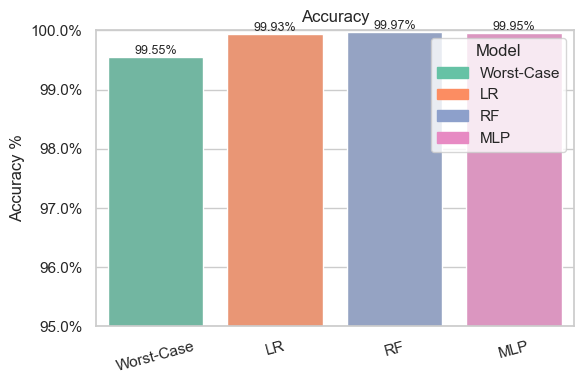

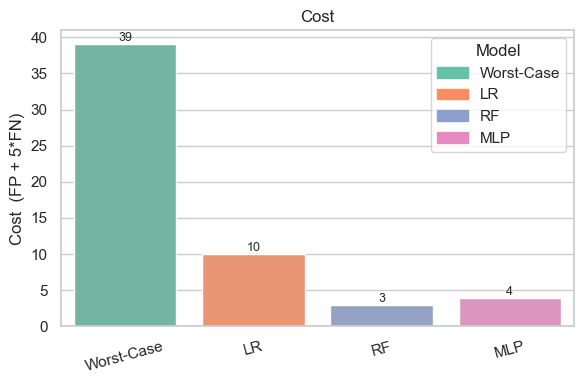

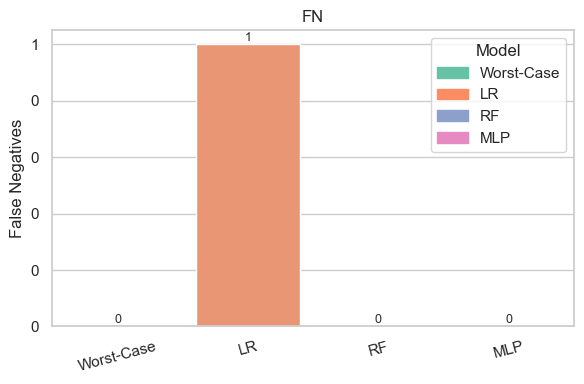

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

summary = pd.DataFrame([
    {"Model":"Worst-Case", "Accuracy":0.9955, "Cost":39, "FP":39, "FN":0, "TP":18, "TN":8583},
    {"Model":"LR",         "Accuracy":0.9993, "Cost":10, "FP":5,  "FN":1, "TP":17, "TN":8617},
    {"Model":"RF",         "Accuracy":0.9997, "Cost":3,  "FP":3,  "FN":0, "TP":18, "TN":8619},
    {"Model":"MLP",        "Accuracy":0.9995, "Cost":4,  "FP":4,  "FN":0, "TP":18, "TN":8618},
])

palette = sns.color_palette("Set2", n_colors=len(summary))

def plot_metric(df, metric, ylabel, filename):
    plt.figure(figsize=(6,4))
    ax = sns.barplot(data=df, x="Model", y=metric, palette=palette)
    
    # value labels
    for p in ax.patches:
        v = p.get_height()
        txt = f"{v:.2%}" if metric=="Accuracy" else f"{int(v)}"
        ax.annotate(txt,
                    (p.get_x() + p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=9)
    
    if metric == "Accuracy":
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.set_ylim(0.95, 1.00)
    else:
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%d"))
    
    ax.set_xlabel("")
    ax.set_ylabel(ylabel)
    ax.set_title(metric)
    ax.tick_params(axis="x", rotation=15)
    
    # explicit legend
    handles = [plt.Rectangle((0,0),1,1, color=c) for c in palette]
    ax.legend(handles, df["Model"], title="Model", loc="best")
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_metric(summary, "Accuracy", "Accuracy %",           "ring100us_accuracy.png")
plot_metric(summary, "Cost",     "Cost  (FP + 5*FN)",    "ring100us_cost.png")
plot_metric(summary, "FN",       "False Negatives",       "ring100us_FN.png")


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL", "FH_DL"])]


y = (df["latOverallSim"] > 75).astype(int)


X_dummy = df[["flowTypeId","bitrate","burstSize",
              "latLimit","hops","latWCmodel"]]   # features not used

_, X_tmp, _, y_tmp = train_test_split(
        X_dummy, y, test_size=0.40, random_state=42, stratify=y)

_, X_test, _, y_test = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)


wc_pred = (df.loc[X_test.index, "latOverallWC"] > 75).astype(int).values

tn, fp, fn, tp = confusion_matrix(y_test, wc_pred).ravel()
cost = fp + 5*fn

print("Worst-Case baseline 75 us")
print(f"TN, FP, FN, TP : ({tn}, {fp}, {fn}, {tp})")
print(f"Accuracy       : {accuracy_score(y_test, wc_pred):.4f}")
print(f"Cost (1*FP + 5*FN): {cost}")


Worst-Case baseline 75 us
TN, FP, FN, TP : (7879, 214, 0, 547)
Accuracy       : 0.9752
Cost (1*FP + 5*FN): 214


### Test 2 - VARIANT TESTING 75 us

In [ ]:
# LR 75 us

COST_FP = 1
COST_FN = 5
RANDOM_STATE = 42


csv75 = "dataset/variants/ring_FH_limit75us.csv"
df75  = pd.read_csv(csv75)

feat_cols = ["flowTypeId","bitrate","burstSize",
             "latLimit","hops","latWCmodel"]

X = df75[feat_cols].copy()
y = df75["latClass"].astype(int)

print(f"Loaded {len(df75):,} rows  –  positives = {y.sum():,}")



X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    X, y, test_size=0.40, random_state=RANDOM_STATE, stratify=y)

X_val, X_te, y_val, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_tmp)

print(f"Shapes  Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")


scaler75 = StandardScaler()
X_tr_s   = scaler75.fit_transform(X_tr)
X_val_s  = scaler75.transform(X_val)
X_te_s   = scaler75.transform(X_te)


#train LR

lr75 = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr75.fit(X_tr_s, y_tr)



val_probs = lr75.predict_proba(X_val_s)[:,1]

thr_grid = np.linspace(0,1,50)
best_thr, best_cost = None, np.inf

for thr in thr_grid:
    preds = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, preds).ravel()
    cost = COST_FP*fp + COST_FN*fn
    if cost < best_cost:
        best_cost, best_thr = cost, thr

print(f"\n[valid set] best_thr = {best_thr:.3f}   min-cost = {best_cost}")


#evaluation on TEST set

test_probs = lr75.predict_proba(X_te_s)[:,1]
test_pred  = (test_probs >= best_thr).astype(int)

tn, fp, fn, tp = confusion_matrix(y_te, test_pred).ravel()
test_cost = COST_FP*fp + COST_FN*fn
test_acc  = accuracy_score(y_te, test_pred)

print("\n[Test-set results — LR 75 us]")
print(f"Threshold   : {best_thr:.3f}")
print(f"Accuracy    : {test_acc:.4f}")
print(f"Cost ( {COST_FP}*FP + {COST_FN}*FN): {test_cost}")
print(f"Confusion   : (TN={tn}, FP={fp}, FN={fn}, TP={tp})")
print("\nDetailed report:")
print(classification_report(y_te, test_pred, digits=4))


# save

joblib.dump(scaler75,     "lr_ring75us_scaler.joblib")
joblib.dump(lr75,         "lr_ring75us_model.joblib")
joblib.dump({"threshold": best_thr,
             "costFP": COST_FP,
             "costFN": COST_FN}, "lr_ring75us_threshold_info.joblib")

print("\nmodel, scaler and threshold saved")


Loaded 43,200 rows  –  positives = 2,736
Shapes  Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)

[valid set] best_thr = 0.184   min-cost = 180

[Test-set results — LR 75 us]
Threshold   : 0.184
Accuracy    : 0.9869
Cost ( 1*FP + 5*FN): 181
Confusion   : (TN=7997, FP=96, FN=17, TP=530)

Detailed report:
              precision    recall  f1-score   support

           0     0.9979    0.9881    0.9930      8093
           1     0.8466    0.9689    0.9037       547

    accuracy                         0.9869      8640
   macro avg     0.9223    0.9785    0.9483      8640
weighted avg     0.9883    0.9869    0.9873      8640


model, scaler and threshold saved


In [ ]:
# RF 75 us

PATH = "dataset/variants/ring_FH_limit75us.csv"
SAVE_DIR = "models_75us"
os.makedirs(SAVE_DIR, exist_ok=True)

df = pd.read_csv(PATH)
X  = df[["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]]
y  = df["latClass"]                       

X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y)

X_val, X_te, y_val, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)

print(f"Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")

# hyper parameter tune small grid
param_grid = {
    'n_estimators':[100],
    'max_depth'   :[None, 10],
    'min_samples_split':[2,5]
}
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
gs      = GridSearchCV(rf_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
gs.fit(X_tr, y_tr)
best_rf = gs.best_estimator_
print("best RF params:", gs.best_params_)

# cost based threshold tuning on valid

val_probs = best_rf.predict_proba(X_val)[:,1]
thresholds = np.linspace(0,1,50)
costFP, costFN = 1, 5
best_thr, best_cost = None, np.inf
for thr in thresholds:
    pr = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, pr).ravel()
    cost = fp*costFP + fn*costFN
    if cost < best_cost:
        best_cost, best_thr = cost, thr
print(f"validation: best_thr = {best_thr:.3f}   min-cost = {best_cost}")

# test evaluation
test_probs = best_rf.predict_proba(X_te)[:,1]
pred       = (test_probs >= best_thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
cost        = fp*costFP + fn*costFN
acc         = accuracy_score(y_te, pred)

print("\ntest-set results — RF 75 us]")
print(f"Threshold   : {best_thr:.3f}")
print(f"Accuracy    : {acc:.4f}")
print(f"Cost (1*FP + 5*FN): {cost}")
print(f"Confusion   : (TN={tn}, FP={fp}, FN={fn}, TP={tp})")
print("\nDetailed report:")
print(classification_report(y_te, pred))

# save
joblib.dump(best_rf,  f"{SAVE_DIR}/rf_75us_model.joblib")
joblib.dump({"threshold":best_thr, "costFP":1, "costFN":5},
            f"{SAVE_DIR}/rf_75us_thr_info.joblib")
print("\nRF model + threshold saved")


Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)
best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
validation: best_thr = 0.061   min-cost = 168

test-set results — RF 75 us]
Threshold   : 0.061
Accuracy    : 0.9852
Cost (1*FP + 5*FN): 148
Confusion   : (TN=7970, FP=123, FN=5, TP=542)

Detailed report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8093
           1       0.82      0.99      0.89       547

    accuracy                           0.99      8640
   macro avg       0.91      0.99      0.94      8640
weighted avg       0.99      0.99      0.99      8640


RF model + threshold saved


In [ ]:
# MLP 75 us

import os, joblib, numpy as np, pandas as pd, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

PATH = "dataset/variants/ring_FH_limit75us.csv"
SAVE_DIR = "models_75us"
os.makedirs(SAVE_DIR, exist_ok=True)

# load + split
df = pd.read_csv(PATH)
X  = df[["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]]
y  = df["latClass"]

X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)

print(f"Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")

# scale
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
X_val_s= scaler.transform(X_val)
X_te_s = scaler.transform(X_te)

# build + train
def build_mlp(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1,  activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp = build_mlp(X_tr_s.shape[1])
es  = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
mlp.fit(X_tr_s, y_tr, epochs=50, batch_size=32,
        validation_data=(X_val_s, y_val), callbacks=[es], verbose=1)

# threshold tuning on validation
val_probs  = mlp.predict(X_val_s, verbose=0).ravel()
thresholds = np.linspace(0,1,50)
costFP, costFN = 1, 5
best_thr, best_cost = None, np.inf
for thr in thresholds:
    pr = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, pr).ravel()
    cost = fp*costFP + fn*costFN
    if cost < best_cost:
        best_cost, best_thr = cost, thr
print(f"validation: best_thr = {best_thr:.3f}   min-cost = {best_cost}")


test_probs = mlp.predict(X_te_s, verbose=0).ravel()
pred       = (test_probs >= best_thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
cost        = fp*costFP + fn*costFN
acc         = accuracy_score(y_te, pred)

print("\n test-set results — MLP 75 us]")
print(f"Threshold   : {best_thr:.3f}")
print(f"Accuracy    : {acc:.4f}")
print(f"Cost (1*FP + 5*FN): {cost}")
print(f"Confusion   : (TN={tn}, FP={fp}, FN={fn}, TP={tp})")
print("\nDetailed report:")
print(classification_report(y_te, pred))

# save
mlp.save(f"{SAVE_DIR}/mlp_75us_model.h5")
joblib.dump(scaler, f"{SAVE_DIR}/mlp_75us_scaler.joblib")
joblib.dump({"threshold":best_thr, "costFP":1, "costFN":5},
            f"{SAVE_DIR}/mlp_75us_thr_info.joblib")
print("\nMLP, scaler + threshold saved")


Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)
Epoch 1/50
810/810 [==============================] - 3s 3ms/step - loss: 0.0605 - accuracy: 0.9793 - val_loss: 0.0281 - val_accuracy: 0.9876
Epoch 2/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0291 - accuracy: 0.9875 - val_loss: 0.0335 - val_accuracy: 0.9846
Epoch 3/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0278 - accuracy: 0.9888 - val_loss: 0.0280 - val_accuracy: 0.9873
Epoch 4/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0273 - accuracy: 0.9883 - val_loss: 0.0293 - val_accuracy: 0.9873
Epoch 5/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0268 - accuracy: 0.9888 - val_loss: 0.0255 - val_accuracy: 0.9885
Epoch 6/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0265 - accuracy: 0.9889 - val_loss: 0.0247 - val_accuracy: 0.9880
Epoch 7/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0264 - accuracy: 0.9887 

### Test 2.1 0.5 us


In [ ]:
# LR 50 us

OST_FP, COST_FN = 1, 5
RANDOM_STATE     = 42

csv50   = "dataset/variants/ring_FH_limit50us.csv"
df50    = pd.read_csv(csv50)

feat_cols = ["flowTypeId","bitrate","burstSize",
             "latLimit","hops","latWCmodel"]

X = df50[feat_cols]
y = df50["latClass"].astype(int)

print(f"Loaded {len(df50):,} rows – positives = {y.sum():,}")

# split 60 20 20
X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    X, y, test_size=0.40, random_state=RANDOM_STATE, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_tmp)
print(f"Shapes  Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")

# scale
scaler50 = StandardScaler()
X_tr_s   = scaler50.fit_transform(X_tr)
X_val_s  = scaler50.transform(X_val)
X_te_s   = scaler50.transform(X_te)

# train LR
lr50 = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr50.fit(X_tr_s, y_tr)

# threshold tuning on validation
val_probs = lr50.predict_proba(X_val_s)[:,1]
thr_grid  = np.linspace(0,1,50)

best_thr = min_cost = None
min_cost = 1e9
for thr in thr_grid:
    pred = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
    cost = COST_FP*fp + COST_FN*fn
    if cost < min_cost:
        min_cost, best_thr = cost, thr

print(f"\n[valid] best_thr={best_thr:.3f}  min-cost={min_cost}")

# evaluate on test
test_probs = lr50.predict_proba(X_te_s)[:,1]
test_pred  = (test_probs >= best_thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, test_pred).ravel()
test_cost = COST_FP*fp + COST_FN*fn
acc       = accuracy_score(y_te, test_pred)

print(f"\n[Test – LR 50 us]")
print(f"thr={best_thr:.3f}  Acc={acc:.4f}  Cost={test_cost}")
print("CM :", (tn, fp, fn, tp))
print(classification_report(y_te, test_pred, digits=4))

# save
os.makedirs("models_50us", exist_ok=True)
joblib.dump(scaler50,    "models_50us/lr_50us_scaler.joblib")
joblib.dump(lr50,        "models_50us/lr_50us_model.joblib")
joblib.dump({"threshold":best_thr,"costFP":COST_FP,"costFN":COST_FN},
            "models_50us/lr_50us_thr_info.joblib")


Loaded 43,200 rows – positives = 10,400
Shapes  Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)

[valid] best_thr=0.204  min-cost=435

[Test – LR 50 µs]
thr=0.204  Acc=0.9668  Cost=415
CM : (6305, 255, 32, 2048)
              precision    recall  f1-score   support

           0     0.9950    0.9611    0.9777      6560
           1     0.8893    0.9846    0.9345      2080

    accuracy                         0.9668      8640
   macro avg     0.9421    0.9729    0.9561      8640
weighted avg     0.9695    0.9668    0.9673      8640



['models_50us/lr_50us_thr_info.joblib']

In [ ]:
# RF 50 us


COST_FP, COST_FN = 1, 5
PATH      = "dataset/variants/ring_FH_limit50us.csv"
SAVE_DIR  = "models_50us";  os.makedirs(SAVE_DIR, exist_ok=True)

df   = pd.read_csv(PATH)
X    = df[["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]]
y    = df["latClass"]

X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)
print(f"Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")


param_grid = {
    "n_estimators":[100],
    "max_depth":[None,10],
    "min_samples_split":[2,5]
}
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
best_rf = GridSearchCV(rf_base, param_grid, cv=5,
                       scoring="accuracy", n_jobs=-1, verbose=0).fit(X_tr, y_tr).best_estimator_
print("best RF params:", best_rf.get_params(deep=False))

# threshold tuning
val_probs = best_rf.predict_proba(X_val)[:,1]
best_thr = min_cost = None; min_cost = 1e9
for thr in np.linspace(0,1,50):
    pred = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
    cost = COST_FP*fp + COST_FN*fn
    if cost < min_cost:
        min_cost, best_thr = cost, thr
print(f"validation best_thr={best_thr:.3f}  cost={min_cost}")

# test
test_probs = best_rf.predict_proba(X_te)[:,1]
pred       = (test_probs >= best_thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
cost = COST_FP*fp + COST_FN*fn
acc  = accuracy_score(y_te, pred)
print(f"\n[Test – RF 50 us]")
print(f"thr={best_thr:.3f}  Acc={acc:.4f}  Cost={cost}")
print("CM :", (tn, fp, fn, tp))
print(classification_report(y_te, pred, digits=4))

# save
joblib.dump(best_rf, f"{SAVE_DIR}/rf_50us_model.joblib")
joblib.dump({"threshold":best_thr,"costFP":COST_FP,"costFN":COST_FN},
            f"{SAVE_DIR}/rf_50us_thr_info.joblib")


Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)
best RF params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
validation best_thr=0.122  cost=394

[Test – RF 50 µs]
thr=0.122  Acc=0.9672  Cost=335
CM : (6290, 270, 13, 2067)
              precision    recall  f1-score   support

           0     0.9979    0.9588    0.9780      6560
           1     0.8845    0.9938    0.9359      2080

    accuracy                         0.9672      8640
   macro avg     0.9412    0.9763    0.9570      8640
weighted avg     0.9706    0.9672    0.9679      8640



['models_50us/rf_50us_thr_info.joblib']

In [ ]:
# MLP 50 us
import os, joblib, numpy as np, pandas as pd, tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

COST_FP, COST_FN = 1, 5
PATH      = "dataset/variants/ring_FH_limit50us.csv"
SAVE_DIR  = "models_50us";  os.makedirs(SAVE_DIR, exist_ok=True)

# load
df = pd.read_csv(PATH)
X  = df[["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]]
y  = df["latClass"]

# split
X_tr, X_tmp, y_tr, y_tmp = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)
print(f"Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")

# scale
scaler = StandardScaler()
X_tr_s, X_val_s, X_te_s = scaler.fit_transform(X_tr), scaler.transform(X_val), scaler.transform(X_te)

# build & train
def build_mlp(n_in):
    m = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(n_in,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1,  activation='sigmoid')
    ])
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return m

mlp = build_mlp(X_tr_s.shape[1])
es  = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
mlp.fit(X_tr_s, y_tr, epochs=50, batch_size=32,
        validation_data=(X_val_s, y_val), callbacks=[es], verbose=1)

# threshold tuning
val_probs = mlp.predict(X_val_s, verbose=0).ravel()
best_thr = min_cost = None; min_cost = 1e9
for thr in np.linspace(0,1,50):
    pred = (val_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
    cost = COST_FP*fp + COST_FN*fn
    if cost < min_cost:
        min_cost, best_thr = cost, thr
print(f"validation best_thr={best_thr:.3f}  cost={min_cost}")

# test
test_probs = mlp.predict(X_te_s, verbose=0).ravel()
pred       = (test_probs >= best_thr).astype(int)
tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
cost = COST_FP*fp + COST_FN*fn
acc  = accuracy_score(y_te, pred)
print(f"\n[Test – MLP 50 us]")
print(f"thr={best_thr:.3f}  Acc={acc:.4f}  Cost={cost}")
print("CM :", (tn, fp, fn, tp))
print(classification_report(y_te, pred, digits=4))

# save
mlp.save(f"{SAVE_DIR}/mlp_50us_model.h5")
joblib.dump(scaler, f"{SAVE_DIR}/mlp_50us_scaler.joblib")
joblib.dump({"threshold":best_thr,"costFP":COST_FP,"costFN":COST_FN},
            f"{SAVE_DIR}/mlp_50us_thr_info.joblib")


Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)
Epoch 1/50
810/810 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9711 - val_loss: 0.0585 - val_accuracy: 0.9765
Epoch 2/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0584 - accuracy: 0.9773 - val_loss: 0.0577 - val_accuracy: 0.9764
Epoch 3/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0577 - accuracy: 0.9771 - val_loss: 0.0594 - val_accuracy: 0.9763
Epoch 4/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0571 - accuracy: 0.9777 - val_loss: 0.0593 - val_accuracy: 0.9758
Epoch 5/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0568 - accuracy: 0.9773 - val_loss: 0.0599 - val_accuracy: 0.9774
Epoch 6/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0574 - accuracy: 0.9775 - val_loss: 0.0570 - val_accuracy: 0.9782
Epoch 7/50
810/810 [==============================] - 2s 2ms/step - loss: 0.0563 - accuracy: 0.9780 

['models_50us/mlp_50us_thr_info.joblib']

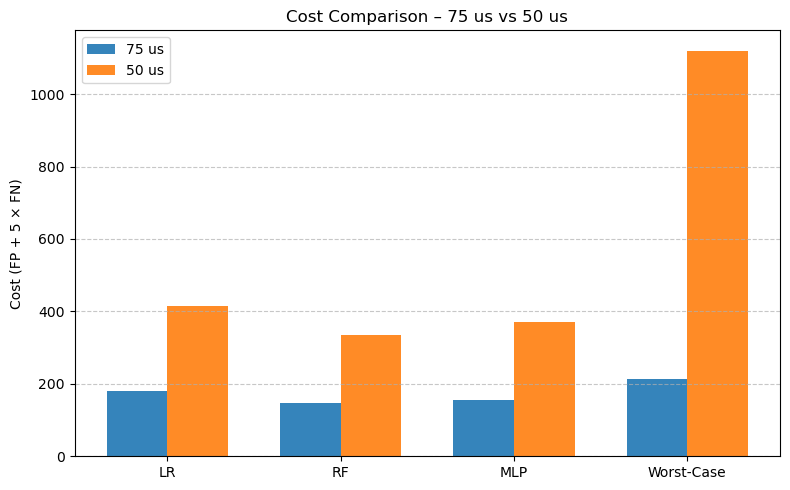

In [2]:
# PLOTS

import matplotlib.pyplot as plt

models = ['LR', 'RF', 'MLP', 'Worst-Case']
cost_75 = [181, 148, 154, 214]
cost_50 = [415, 335, 371, 1120]

x = range(len(models))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], cost_75, width=width, label='75 us', alpha=0.9)
plt.bar([i + width/2 for i in x], cost_50, width=width, label='50 us', alpha=0.9)

plt.xticks(x, models)
plt.ylabel("Cost (FP + 5 × FN)")
plt.title("Cost Comparison – 75 us vs 50 us")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


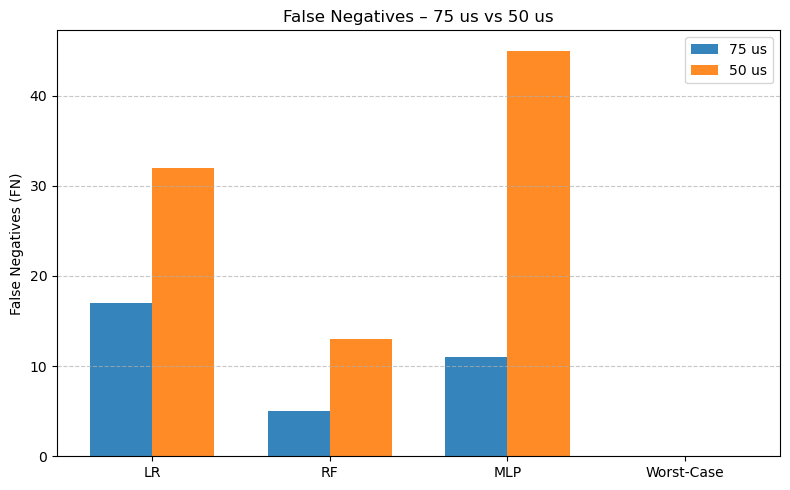

In [3]:
fn_75 = [17, 5, 11, 0]
fn_50 = [32, 13, 45, 0]

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], fn_75, width=width, label='75 us', alpha=0.9)
plt.bar([i + width/2 for i in x], fn_50, width=width, label='50 us', alpha=0.9)

plt.xticks(x, models)
plt.ylabel("False Negatives (FN)")
plt.title("False Negatives – 75 us vs 50 us")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


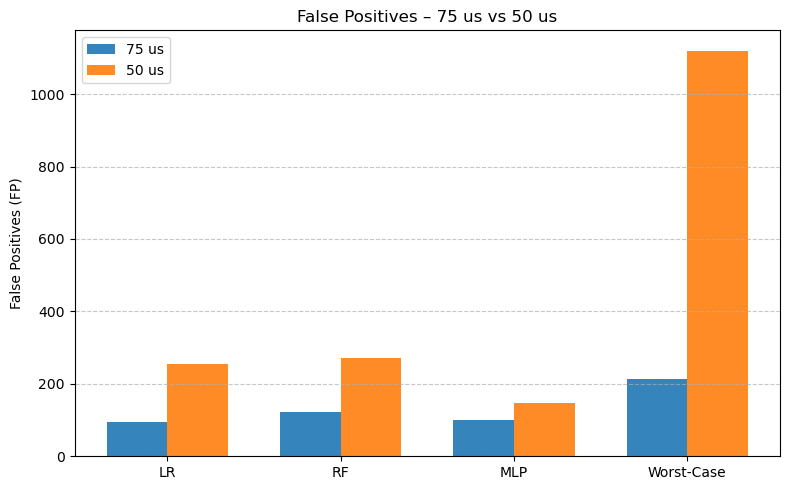

In [4]:
fp_75 = [96, 123, 99, 214]
fp_50 = [255, 270, 146, 1120]

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], fp_75, width=width, label='75 us', alpha=0.9)
plt.bar([i + width/2 for i in x], fp_50, width=width, label='50 us', alpha=0.9)

plt.xticks(x, models)
plt.ylabel("False Positives (FP)")
plt.title("False Positives – 75 us vs 50 us")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


### Test 3 - per TrWindow analysis

In [ ]:

COST_FP, COST_FN = 1, 5             
RND            = 42                   
FILES = {                             
    "trWindow 33 us" : "dataset/variants/ring_FH_trWindow3.33e-05.csv",
    "trWindow 16 us" : "dataset/variants/ring_FH_trWindow1.67e-05.csv"
}
FEATS = ["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]

# a small MLP

def build_mlp(input_dim : int):
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(input_dim,)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1 , activation="sigmoid")
    ])
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

#loop through both trWindow subsets

rows = []                     

for label, path in FILES.items():
    print(f"\n=== {label}  ({os.path.basename(path)}) ===")
    df   = pd.read_csv(path)
    X    = df[FEATS].copy()
    y    = df["latClass"].astype(int)
    print(f"rows={len(df):,}   positives={y.sum():,}")

    # 60 / 20 / 20 split
    X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RND, stratify=y)
    X_val, X_te,  y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RND, stratify=y_tmp)

    # scaling
    sc   = StandardScaler().fit(X_tr)
    X_tr_s, X_val_s, X_te_s = sc.transform(X_tr), sc.transform(X_val), sc.transform(X_te)

    # MLP training
    mlp  = build_mlp(X_tr_s.shape[1])
    es   = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    mlp.fit(X_tr_s, y_tr, epochs=50, batch_size=32,
            validation_data=(X_val_s, y_val),
            callbacks=[es], verbose=0)

    # threshold tuning on validation set
    val_probs = mlp.predict(X_val_s, verbose=0).ravel()
    thr_grid  = np.linspace(0,1,50)
    best_thr, best_cost = None, np.inf
    for thr in thr_grid:
        pred = (val_probs >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
        cost = COST_FP*fp + COST_FN*fn
        if cost < best_cost:
            best_cost, best_thr = cost, thr
    print(f"valid set: best_thr={best_thr:.3f}   min-cost={best_cost}")

    # final evaluation TEST
    test_probs = mlp.predict(X_te_s , verbose=0).ravel()
    pred       = (test_probs >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
    cost   = COST_FP*fp + COST_FN*fn
    acc    = accuracy_score(y_te, pred)

    print(f"test set:  Acc={acc:.4f}  Cost={cost}")
    print("CM :", (tn, fp, fn, tp))

    rows.append({
        "Subset"  : label,
        "Accuracy": acc,
        "Cost"    : cost,
        "FP"      : fp,
        "FN"      : fn,
        "TP"      : tp,
        "TN"      : tn,
        "Thr"     : best_thr
    })

# table summ
summary = pd.DataFrame(rows)
display(summary.style.format({"Accuracy":"{:.4%}",
                              "Cost":"{:,.0f}",
                              "Thr":"{:.3f}"}))



=== trWindow 33 us  (ring_FH_trWindow3.33e-05.csv) ===
rows=21,600   positives=85
valid set: best_thr=0.020   min-cost=11
test set:  Acc=0.9961  Cost=21
CM : (4287, 16, 1, 16)

=== trWindow 16 us  (ring_FH_trWindow1.67e-05.csv) ===
rows=21,600   positives=6
valid set: best_thr=0.020   min-cost=1
test set:  Acc=1.0000  Cost=0
CM : (4319, 0, 0, 1)


,Subset,Accuracy,Cost,FP,FN,TP,TN,Thr
0,trWindow 33 us,99.6065%,21,16,1,16,4287,0.020
1,trWindow 16 us,100.0000%,0,0,0,1,4319,0.020


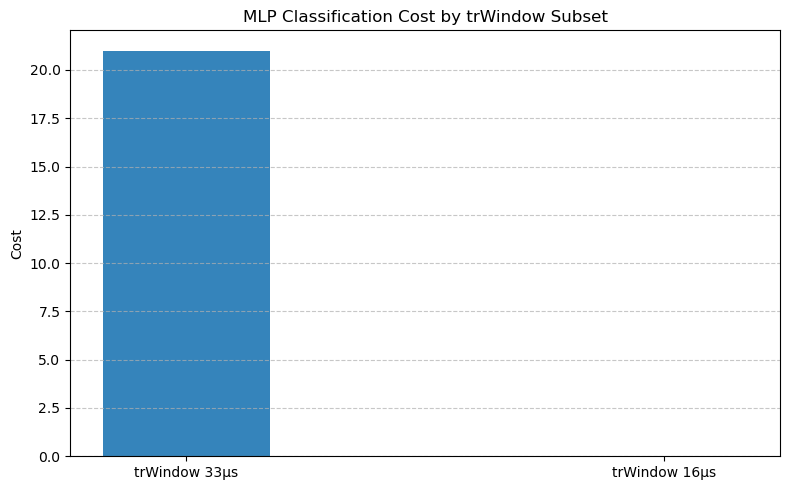

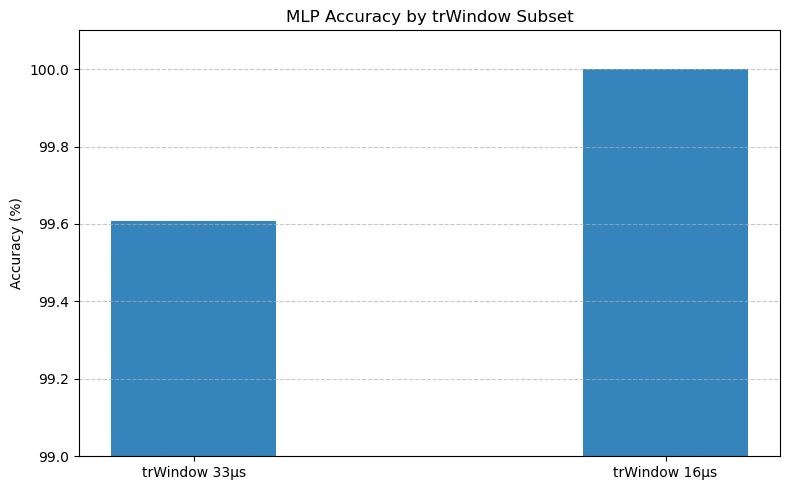

In [ ]:
import matplotlib.pyplot as plt


subsets = ["trWindow 33µs", "trWindow 16µs"]
costs = [21, 0]
accuracies = [99.6065, 100.0]


x = range(len(subsets))
width = 0.35


plt.figure(figsize=(8, 5))
plt.bar(x, costs, width=width, label='Cost (FP + 5·FN)', alpha=0.9)
plt.xticks(x, subsets)
plt.ylabel("Cost")
plt.title("MLP Classification Cost by trWindow Subset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# plot
plt.figure(figsize=(8, 5))
plt.bar(x, accuracies, width=width, label='Accuracy (%)', alpha=0.9)
plt.xticks(x, subsets)
plt.ylabel("Accuracy (%)")
plt.title("MLP Accuracy by trWindow Subset")
plt.ylim(99.0, 100.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


### Test 4 - New Features

In [ ]:
import os, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection       import train_test_split, GridSearchCV
from sklearn.preprocessing         import StandardScaler
from sklearn.metrics               import (confusion_matrix, accuracy_score,
                                          classification_report)
from sklearn.linear_model          import LogisticRegression
from sklearn.ensemble              import RandomForestClassifier
from tensorflow import keras, random as tf_random, get_logger

get_logger().setLevel('ERROR')      
RND = 42
C_FP, C_FN = 1, 5                  
PATH_RING = "dataset/RING_data_backup.csv" 



df = pd.read_csv(PATH_RING)
df = df[df["flowName"].isin(["FH_UL","FH_DL"])].reset_index(drop=True)
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

base_6 = ["flowTypeId","bitrate","burstSize",
          "latLimit","hops","latWCmodel"]
ext_8  = base_6 + ["latEPsameINsum","latEPotherINsum"]

feature_sets = {"base_6":base_6, "ext_8":ext_8}


X_full = df[ext_8]
y_full = df["latClass"]

X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X_full, y_full, test_size=0.40, random_state=RND, stratify=y_full)
X_val, X_te,  y_val, y_te  = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RND, stratify=y_tmp)

#  train + tune + eva one model
def tune_threshold(val_probs, thr_grid=np.linspace(0,1,50)):
    best_thr, best_cost = None, np.inf
    for thr in thr_grid:
        pred = (val_probs >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
        cost = C_FP*fp + C_FN*fn
        if cost < best_cost: best_cost, best_thr = cost, thr
    return best_thr

def final_scores(test_probs, thr, label):
    pred = (test_probs >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred).ravel()
    return dict(Model=label,
                Accuracy = accuracy_score(y_te, pred),
                Cost     = C_FP*fp + C_FN*fn,
                FP=fp, FN=fn, TP=tp, TN=tn)

# loop over feature sets and models
summary_rows = []

for tag, feats in feature_sets.items():
    print(f"\nFeature set: {tag}  ({len(feats)} features)")
    
    X_tr_fs  = X_tr[feats].copy();  X_val_fs = X_val[feats].copy();  X_te_fs = X_te[feats].copy()

    # LR model
    sc = StandardScaler()
    X_tr_s, X_val_s, X_te_s = sc.fit_transform(X_tr_fs), sc.transform(X_val_fs), sc.transform(X_te_fs)
    
    lr = LogisticRegression(max_iter=1000, random_state=RND)
    lr.fit(X_tr_s, y_tr)
    thr = tune_threshold(lr.predict_proba(X_val_s)[:,1])
    row = final_scores(lr.predict_proba(X_te_s)[:,1], thr, f"LR ({tag})")
    summary_rows.append(row)
    
    # RF model
    rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=RND, n_jobs=-1)
    rf.fit(X_tr_fs, y_tr)
    thr = tune_threshold(rf.predict_proba(X_val_fs)[:,1])
    row = final_scores(rf.predict_proba(X_te_fs)[:,1], thr, f"RF ({tag})")
    summary_rows.append(row)
    
    # MLP model
    tf_random.set_seed(RND)
    mlp = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(len(feats),)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1,  activation='sigmoid')
    ])
    mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
    mlp.fit(X_tr_s, y_tr, epochs=50, batch_size=32,
            validation_data=(X_val_s, y_val), callbacks=[es], verbose=0)
    thr = tune_threshold( mlp.predict(X_val_s, verbose=0).ravel() )
    row = final_scores( mlp.predict(X_te_s,  verbose=0).ravel(), thr, f"MLP ({tag})")
    summary_rows.append(row)

# results table
summary = pd.DataFrame(summary_rows).round(4)
summary = summary.sort_values(["Model"])
display(summary[["Model","Accuracy","Cost","FP","FN","TP","TN"]])



Feature set: base_6  (6 features)

Feature set: ext_8  (8 features)


,Model,Accuracy,Cost,FP,FN,TP,TN
0,LR (base_6),0.9993,10,5,1,17,8617
3,LR (ext_8),0.9994,9,4,1,17,8618
2,MLP (base_6),0.9995,8,3,1,17,8619
5,MLP (ext_8),0.9991,8,8,0,18,8614
1,RF (base_6),0.9997,3,3,0,18,8619
4,RF (ext_8),0.9999,1,1,0,18,8621


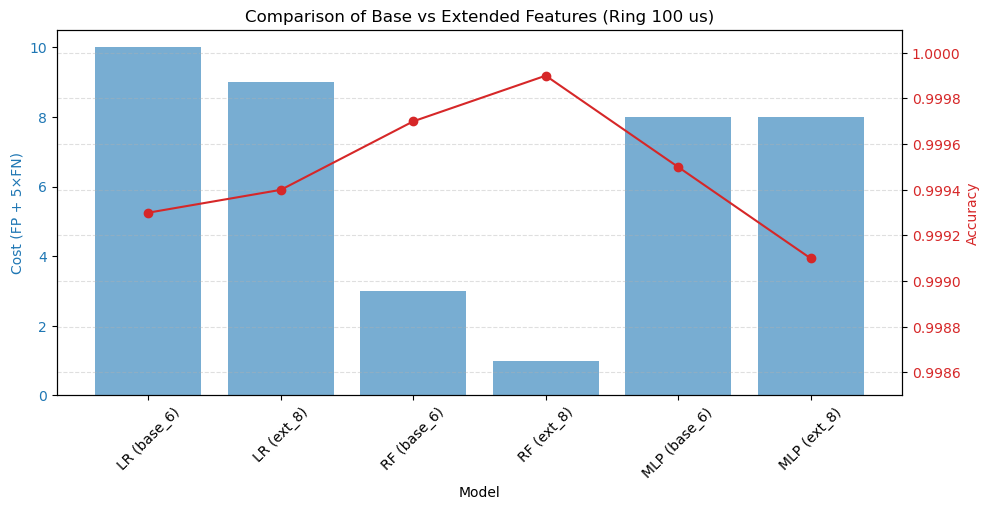

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models     = ["LR (base_6)", "LR (ext_8)", "RF (base_6)", "RF (ext_8)", "MLP (base_6)", "MLP (ext_8)"]
costs      = [10, 9, 3, 1, 8, 8]
accuracies = [0.9993, 0.9994, 0.9997, 0.9999, 0.9995, 0.9991]

x = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(10, 5))


color = 'tab:blue'
ax1.set_xlabel("Model")
ax1.set_ylabel("Cost (FP + 5×FN)", color=color)
bars = ax1.bar(x, costs, color=color, alpha=0.6, label="Cost")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)

# accuracy line
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Accuracy", color=color)
ax2.plot(x, accuracies, color=color, marker='o', label="Accuracy")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0.9985, 1.0001)

fig.tight_layout()
plt.title("Comparison of Base vs Extended Features (Ring 100 us)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Test 5 - Replace “hops” with “latStatic”

Train:(25920, 6)  Val:(8640, 6)  Test:(8640, 6)

[LR (hops->static)]  thr=0.469  Acc=0.9995  Cost=12
CM : (8620, 2, 2, 16)

[RF (hops->static)]  thr=0.265  Acc=0.9999  Cost=1
CM : (8621, 1, 0, 18)

[MLP (hops->static)]  thr=0.204  Acc=0.9997  Cost=7
CM : (8620, 2, 1, 17)


,Model,Accuracy,Cost,FP,FN,TP,TN
0,LR (hops->static),0.999537,12,2,2,16,8620
1,RF (hops->static),0.999884,1,1,0,18,8621
2,MLP (hops->static),0.999653,7,2,1,17,8620


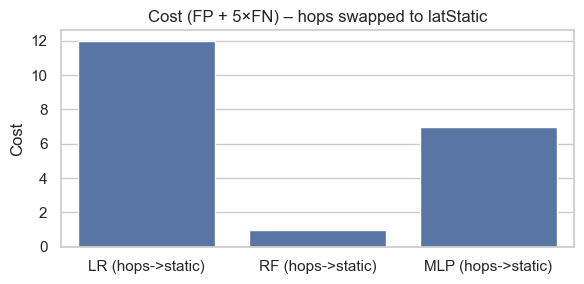

In [22]:
import os, joblib, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split, GridSearchCV
from sklearn.preprocessing     import StandardScaler
from sklearn.linear_model      import LogisticRegression
from sklearn.ensemble          import RandomForestClassifier
from sklearn.metrics           import confusion_matrix, accuracy_score, classification_report
from tensorflow                import keras

COST_FP, COST_FN   = 1, 5
RANDOM_STATE       = 42
PATH_RING          = "dataset/RING_data_backup.csv"
SAVE_DIR           = "models_hops2static"
os.makedirs(SAVE_DIR, exist_ok=True)


df = pd.read_csv(PATH_RING)
df = df[df["flowName"].isin(["FH_UL", "FH_DL"])].reset_index(drop=True)
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

# (hops -> latStatic)
feat_cols = ["flowTypeId", "bitrate", "burstSize",
             "latLimit",  "latStatic", "latWCmodel"]

X = df[feat_cols].copy()
y = df["latClass"].astype(int)

# 60 / 20 / 20 split
X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RANDOM_STATE, stratify=y)
X_val, X_te,  y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_tmp)

print(f"Train:{X_tr.shape}  Val:{X_val.shape}  Test:{X_te.shape}")

# tune thr
def cost_tune_and_score(val_probs, test_probs, label):
    thr_grid = np.linspace(0,1,50)
    best_thr, best_cost = None, np.inf
    for thr in thr_grid:
        pr = (val_probs >= thr).astype(int)
        _, fp, fn, _ = confusion_matrix(y_val, pr).ravel()
        cost = COST_FP*fp + COST_FN*fn
        if cost < best_cost:
            best_cost, best_thr = cost, thr

    test_pred = (test_probs >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, test_pred).ravel()
    acc        = accuracy_score(y_te, test_pred)
    cost_test  = fp*COST_FP + fn*COST_FN

    print(f"\n[{label}]  thr={best_thr:.3f}  Acc={acc:.4f}  Cost={cost_test}")
    print("CM :", (tn, fp, fn, tp))
    return {"Model":label, "Accuracy":acc, "Cost":cost_test,
            "FP":fp, "FN":fn, "TP":tp, "TN":tn}

rows = []


# LR model

scaler_lr = StandardScaler()
X_tr_s = scaler_lr.fit_transform(X_tr)
X_val_s= scaler_lr.transform(X_val)
X_te_s = scaler_lr.transform(X_te)

lr = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
lr.fit(X_tr_s, y_tr)

rows.append(
    cost_tune_and_score(lr.predict_proba(X_val_s)[:,1],
                        lr.predict_proba(X_te_s)[:,1],
                        "LR (hops->static)")
)


# RF model

rf = RandomForestClassifier(
        n_estimators=100, max_depth=None, min_samples_split=5,
        random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_tr, y_tr)

rows.append(
    cost_tune_and_score(rf.predict_proba(X_val)[:,1],
                        rf.predict_proba(X_te)[:,1],
                        "RF (hops->static)")
)


# MLP model

scaler_mlp = StandardScaler()
X_tr_s = scaler_mlp.fit_transform(X_tr)
X_val_s= scaler_mlp.transform(X_val)
X_te_s = scaler_mlp.transform(X_te)

def build_mlp(input_dim):
    mdl = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1,  activation='sigmoid')
    ])
    mdl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return mdl

mlp = build_mlp(X_tr_s.shape[1])
es  = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
mlp.fit(X_tr_s, y_tr, epochs=50, batch_size=32,
        validation_data=(X_val_s, y_val), callbacks=[es], verbose=0)

rows.append(
    cost_tune_and_score(mlp.predict(X_val_s, verbose=0).ravel(),
                        mlp.predict(X_te_s , verbose=0).ravel(),
                        "MLP (hops->static)")
)

# plot + summ

summary = pd.DataFrame(rows)
display(summary)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,3))
sns.barplot(x="Model", y="Cost", data=summary, color='#4C72B0')
plt.title("Cost (FP + 5×FN) – hops swapped to latStatic")
plt.ylabel("Cost")
plt.xlabel("")
plt.tight_layout()
plt.show()


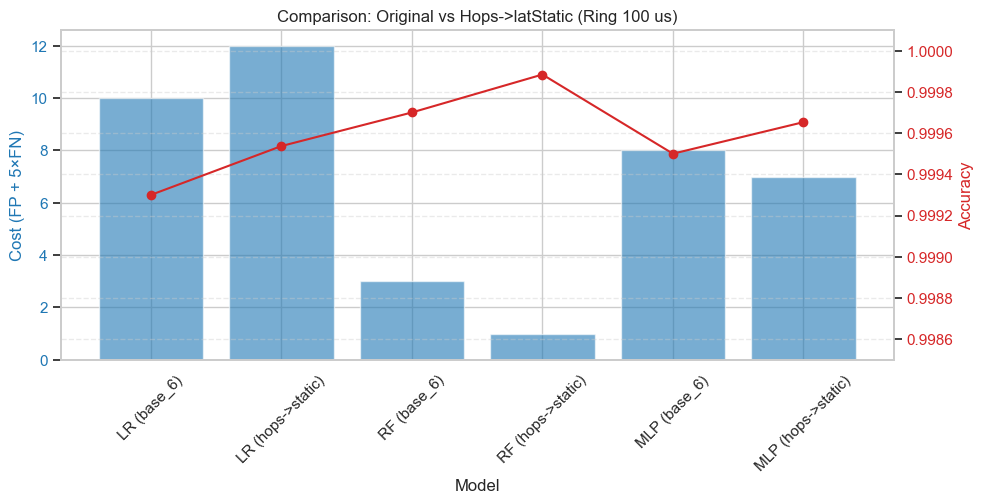

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ["LR (base_6)", "LR (hops->static)",
          "RF (base_6)", "RF (hops->static)",
          "MLP (base_6)", "MLP (hops->static)"]

costs = [10, 12, 3, 1, 8, 7]
accuracies = [0.9993, 0.999537, 0.9997, 0.999884, 0.9995, 0.999653]

x = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(10, 5))


ax1.set_xlabel("Model")
ax1.set_ylabel("Cost (FP + 5×FN)", color='tab:blue')
ax1.bar(x, costs, color='tab:blue', alpha=0.6, label="Cost")
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)


ax2 = ax1.twinx()
ax2.set_ylabel("Accuracy", color='tab:red')
ax2.plot(x, accuracies, color='tab:red', marker='o', label="Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(0.9985, 1.0001)

fig.tight_layout()
plt.title("Comparison: Original vs Hops->latStatic (Ring 100 us)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Test 6 - FN/FP Cost weight sensitivity

,costFN,best_thr,FP,FN,Final Cost
0,3,0.306,5,1,8
1,5,0.306,5,1,10
2,7,0.122,16,0,16
3,10,0.122,16,0,16


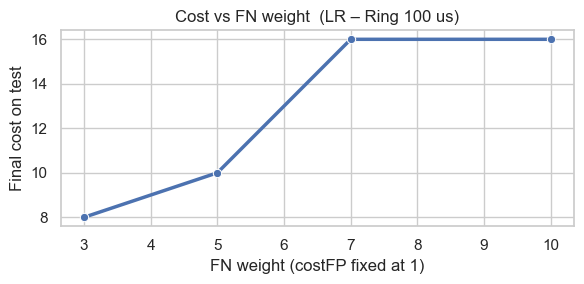

In [ ]:
# LR


import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, joblib
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow import keras  

sns.set_theme(style="whitegrid")      


scaler = joblib.load("ring_scaler.joblib")
lr      = joblib.load("logreg_ring_model.joblib")


RANDOM_STATE = 42
df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL","FH_DL"])]
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

# features
feat_cols = ["flowTypeId","bitrate","burstSize",
             "latLimit","hops","latWCmodel"]          
X = df[feat_cols]
y = df["latClass"]

_, X_tmp, _, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RANDOM_STATE, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_tmp)


X_val_s = scaler.transform(X_val)
X_te_s  = scaler.transform(X_te)


prob_val = lr.predict_proba(X_val_s)[:,1]
prob_te  = lr.predict_proba(X_te_s)[:,1]




cost_pairs = [(1,3),(1,5),(1,7),(1,10)]
thr_grid   = np.linspace(0,1,50)

records = []

for costFP, costFN in cost_pairs:
    best_thr, best_cost = None, np.inf
    
    # threshold on validation probabilities
    for thr in thr_grid:
        pred = (prob_val >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
        cost = fp*costFP + fn*costFN
        if cost < best_cost:
            best_cost, best_thr = cost, thr
    
    # apply that threshold on the test set
    pred_test = (prob_te >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred_test).ravel()
    cost_test = fp*costFP + fn*costFN
    
    records.append({
        "costFN"     : costFN,
        "best_thr"   : round(best_thr,3),
        "FP"         : fp,
        "FN"         : fn,
        "Final Cost" : cost_test
    })

results = pd.DataFrame(records)
display(results)

# plot
plt.figure(figsize=(6,3))
sns.lineplot(x="costFN", y="Final Cost", data=results, marker="o", linewidth=2.5)
plt.title("Cost vs FN weight  (LR – Ring 100 us)")
plt.xlabel("FN weight (costFP fixed at 1)")
plt.ylabel("Final cost on test")
plt.tight_layout()
plt.show()


,costFN,best_thr,FP,FN,Final Cost
0,3,0.143,3,1,6
1,5,0.102,8,1,13
2,7,0.102,8,1,15
3,10,0.102,8,1,18


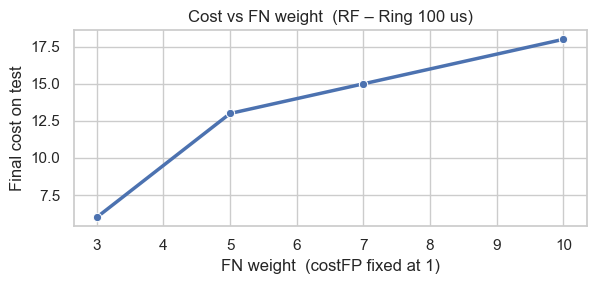

In [38]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
sns.set_theme(style="whitegrid")


rf = joblib.load("best_rf_ring_model.joblib")     # path you saved earlier

RANDOM_STATE = 42
df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL", "FH_DL"])]
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

feat_cols = ["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]
X = df[feat_cols]
y = df["latClass"]

_, X_tmp, _, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RANDOM_STATE, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_tmp)

# no scaler
prob_val = rf.predict_proba(X_val)[:,1]
prob_te  = rf.predict_proba(X_te )[:,1]

cost_pairs = [(1,3),(1,5),(1,7),(1,10)]
thr_grid   = np.linspace(0,1,50)
records    = []

for costFP, costFN in cost_pairs:
    best_thr, best_cost = None, np.inf
    for thr in thr_grid:
        pred = (prob_val >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
        cost = fp*costFP + fn*costFN
        if cost < best_cost:
            best_cost, best_thr = cost, thr
    # apply to test
    pred_te = (prob_te >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred_te).ravel()
    records.append({
        "costFN":costFN, "best_thr":round(best_thr,3),
        "FP":fp, "FN":fn, "Final Cost":fp*costFP + fn*costFN
    })

rf_results = pd.DataFrame(records)
display(rf_results)

plt.figure(figsize=(6,3))
sns.lineplot(x="costFN", y="Final Cost", data=rf_results,
             marker="o", linewidth=2.5)
plt.title("Cost vs FN weight  (RF – Ring 100 us)")
plt.xlabel("FN weight  (costFP fixed at 1)")
plt.ylabel("Final cost on test")
plt.tight_layout(); plt.show()


,costFN,best_thr,FP,FN,Final Cost
0,3,0.265,2,1,5
1,5,0.265,2,1,7
2,7,0.265,2,1,9
3,10,0.041,18,0,18


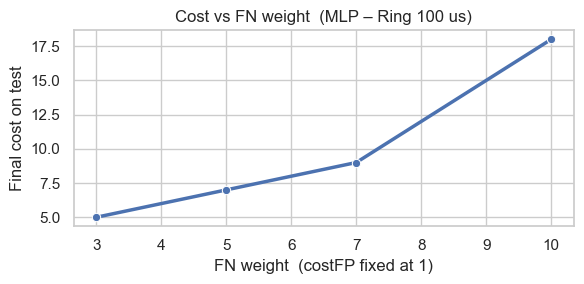

In [39]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
sns.set_theme(style="whitegrid")

scaler = joblib.load("ring_scaler.joblib")
mlp    = keras.models.load_model("mlp_ring_model.h5")


RANDOM_STATE = 42
df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL","FH_DL"])]
df["latClass"] = (df["latOverallSim"] > 100).astype(int)
feat_cols = ["flowTypeId","bitrate","burstSize","latLimit","hops","latWCmodel"]
X = df[feat_cols]
y = df["latClass"]

_, X_tmp, _, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RANDOM_STATE, stratify=y)
X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_tmp)

X_val_s = scaler.transform(X_val)
X_te_s  = scaler.transform(X_te)


prob_val = mlp.predict(X_val_s, verbose=0).ravel()
prob_te  = mlp.predict(X_te_s , verbose=0).ravel()


cost_pairs = [(1,3),(1,5),(1,7),(1,10)]
thr_grid   = np.linspace(0,1,50)
records    = []

for costFP, costFN in cost_pairs:
    best_thr, best_cost = None, np.inf
    for thr in thr_grid:
        pred = (prob_val >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
        cost = fp*costFP + fn*costFN
        if cost < best_cost:
            best_cost, best_thr = cost, thr
    pred_te = (prob_te >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred_te).ravel()
    records.append({
        "costFN":costFN, "best_thr":round(best_thr,3),
        "FP":fp, "FN":fn, "Final Cost":fp*costFP + fn*costFN
    })

mlp_results = pd.DataFrame(records)
display(mlp_results)

plt.figure(figsize=(6,3))
sns.lineplot(x="costFN", y="Final Cost", data=mlp_results,
             marker="o", linewidth=2.5)
plt.title("Cost vs FN weight  (MLP – Ring 100 us)")
plt.xlabel("FN weight  (costFP fixed at 1)")
plt.ylabel("Final cost on test")
plt.tight_layout(); plt.show()


### Test 7 - UL vs DL flow Behavior

In [ ]:
# LR

import numpy as np, pandas as pd, joblib, warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix, accuracy_score, classification_report

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL","FH_DL"])].reset_index(drop=True)
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

FEATURES = ["flowTypeId","bitrate","burstSize",
            "latLimit","hops","latWCmodel"]
COST_FP, COST_FN = 1, 5
RNG = 42

# results
rows = []

for flow_id,label in [(0,"UL (flowTypeId=0)"),
                      (1,"DL (flowTypeId=1)")]:
    
    subset = df[df["flowTypeId"] == flow_id].copy()
    X = subset[FEATURES]
    y = subset["latClass"].astype(int)
    
    # split 60 / 20 / 20
    X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RNG, stratify=y)
    X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RNG, stratify=y_tmp)
    
    # scale
    sc  = StandardScaler()
    X_tr_s = sc.fit_transform(X_tr)
    X_val_s= sc.transform(X_val)
    X_te_s = sc.transform(X_te)
    
    # train LR
    lr = LogisticRegression(max_iter=1000, random_state=RNG)
    lr.fit(X_tr_s, y_tr)
    
    thr_grid = np.linspace(0,1,201)        # finer grid (step 0.005)
    best_thr, best_cost = None, np.inf
    val_probs = lr.predict_proba(X_val_s)[:,1]
    for thr in thr_grid:
        pred = (val_probs >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pred).ravel()
        cost = COST_FP*fp + COST_FN*fn
        if cost < best_cost:
            best_cost, best_thr = cost, thr
    
    # test evaluation
    test_probs = lr.predict_proba(X_te_s)[:,1]
    pred_test  = (test_probs >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred_test).ravel()
    cost_test   = COST_FP*fp + COST_FN*fn
    acc_test    = accuracy_score(y_te, pred_test)
    
    rows.append({
        "Subset"    : label,
        "Samples"   : len(subset),
        "Positives" : int(y.sum()),
        "Best_thr"  : round(best_thr,3),
        "Accuracy"  : round(acc_test,4),
        "Cost"      : cost_test,
        "FP"        : fp,
        "FN"        : fn,
        "TP"        : tp,
        "TN"        : tn
    })
    
    print(f"\n {label} ")
    print(f"thr={best_thr:.3f}  Acc={acc_test:.4f}  Cost={cost_test}")
    print("CM :", (tn, fp, fn, tp))
    print(classification_report(y_te, pred_test, digits=4))

summary = pd.DataFrame(rows)
display(summary)



 UL (flowTypeId=0) 
thr=0.205  Acc=0.9991  Cost=8
CM : (4306, 3, 1, 10)
              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9995      4309
           1     0.7692    0.9091    0.8333        11

    accuracy                         0.9991      4320
   macro avg     0.8845    0.9542    0.9164      4320
weighted avg     0.9992    0.9991    0.9991      4320


 DL (flowTypeId=1) 
thr=0.125  Acc=0.9986  Cost=10
CM : (4309, 5, 1, 5)
              precision    recall  f1-score   support

           0     0.9998    0.9988    0.9993      4314
           1     0.5000    0.8333    0.6250         6

    accuracy                         0.9986      4320
   macro avg     0.7499    0.9161    0.8122      4320
weighted avg     0.9991    0.9986    0.9988      4320



,Subset,Samples,Positives,Best_thr,Accuracy,Cost,FP,FN,TP,TN
0,UL (flowTypeId=0),21600,58,0.205,0.9991,8,3,1,10,4306
1,DL (flowTypeId=1),21600,33,0.125,0.9986,10,5,1,5,4309


In [42]:
# MLP

import numpy as np, pandas as pd, joblib, warnings, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import confusion_matrix, accuracy_score, classification_report
from tensorflow import keras
warnings.filterwarnings("ignore", category=FutureWarning)


df = pd.read_csv("dataset/RING_data_backup.csv")
df = df[df["flowName"].isin(["FH_UL","FH_DL"])].reset_index(drop=True)
df["latClass"] = (df["latOverallSim"] > 100).astype(int)

FEATURES = ["flowTypeId","bitrate","burstSize",
            "latLimit","hops","latWCmodel"]        
COST_FP, COST_FN = 1, 5
RNG = 42

def build_mlp(input_dim):
    m = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1,  activation='sigmoid')
    ])
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return m

summary_rows = []

for fid,label in [(0,"UL (flowTypeId=0)"), (1,"DL (flowTypeId=1)")]:
    
    subset = df[df["flowTypeId"] == fid].copy()
    X = subset[FEATURES].values
    y = subset["latClass"].astype(int).values
    
    # 60 20 20 split + scale
    X_tr, X_tmp, y_tr, y_tmp = train_test_split(
        X, y, test_size=0.40, random_state=RNG, stratify=y)
    X_val, X_te, y_val, y_te = train_test_split(
        X_tmp, y_tmp, test_size=0.50, random_state=RNG, stratify=y_tmp)
    
    sc  = StandardScaler()
    X_tr_s = sc.fit_transform(X_tr)
    X_val_s= sc.transform(X_val)
    X_te_s = sc.transform(X_te)
    
    # build + train MLP
    mlp = build_mlp(X_tr_s.shape[1])
    es  = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    mlp.fit(X_tr_s, y_tr, epochs=50, batch_size=32,
            validation_data=(X_val_s, y_val),
            callbacks=[es], verbose=0)
    
    # threshold tuning on validation
    val_probs = mlp.predict(X_val_s, verbose=0).ravel()
    thr_grid  = np.linspace(0,1,201)                # 0.005 step
    best_thr, best_cost = None, np.inf
    for thr in thr_grid:
        pr = (val_probs >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_val, pr).ravel()
        cost = fp*COST_FP + fn*COST_FN
        if cost < best_cost:
            best_cost, best_thr = cost, thr
    
    # evaluation
    test_probs = mlp.predict(X_te_s, verbose=0).ravel()
    pred_test  = (test_probs >= best_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_te, pred_test).ravel()
    cost_test   = fp*COST_FP + fn*COST_FN
    acc_test    = accuracy_score(y_te, pred_test)
    
    summary_rows.append({
        "Subset"    : label,
        "Samples"   : len(subset),
        "Positives" : int(y.sum()),
        "Best_thr"  : round(best_thr,3),
        "Accuracy"  : round(acc_test,4),
        "Cost"      : cost_test,
        "FP"        : fp,
        "FN"        : fn,
        "TP"        : tp,
        "TN"        : tn
    })
    
    print(f"\n {label} ")
    print(f"best_thr={best_thr:.3f}  Acc={acc_test:.4f}  Cost={cost_test}")
    print("Confusion :", (tn, fp, fn, tp))
    print(classification_report(y_te, pred_test, digits=4))

summary = pd.DataFrame(summary_rows)
display(summary)



=== UL (flowTypeId=0) ===
best_thr=0.130  Acc=0.9991  Cost=8
Confusion : (4306, 3, 1, 10)
              precision    recall  f1-score   support

           0     0.9998    0.9993    0.9995      4309
           1     0.7692    0.9091    0.8333        11

    accuracy                         0.9991      4320
   macro avg     0.8845    0.9542    0.9164      4320
weighted avg     0.9992    0.9991    0.9991      4320


=== DL (flowTypeId=1) ===
best_thr=0.135  Acc=0.9998  Cost=5
Confusion : (4314, 0, 1, 5)
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999      4314
           1     1.0000    0.8333    0.9091         6

    accuracy                         0.9998      4320
   macro avg     0.9999    0.9167    0.9545      4320
weighted avg     0.9998    0.9998    0.9998      4320



,Subset,Samples,Positives,Best_thr,Accuracy,Cost,FP,FN,TP,TN
0,UL (flowTypeId=0),21600,58,0.130,0.9991,8,3,1,10,4306
1,DL (flowTypeId=1),21600,33,0.135,0.9998,5,0,1,5,4314


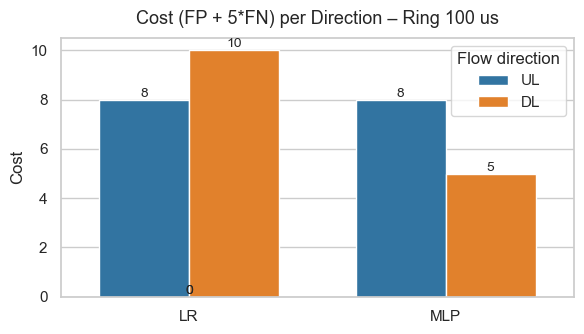

In [44]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(style="whitegrid")


cost_table = pd.DataFrame({
    "Model"     : ["LR", "LR", "MLP", "MLP"],
    "Direction" : ["UL", "DL", "UL", "DL"],
    "Cost"      : [8, 10, 8, 5]
})


plt.figure(figsize=(6,3.5))
ax = sns.barplot(data=cost_table,
                 x="Model", y="Cost", hue="Direction",
                 palette=["#1f77b4","#ff7f0e"], width=0.7)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

ax.set_title("Cost (FP + 5*FN) per Direction – Ring 100 us", fontsize=13, pad=10)
ax.set_ylabel("Cost")
ax.set_xlabel("")
ax.legend(title="Flow direction", loc='upper right')
plt.tight_layout()
plt.show()

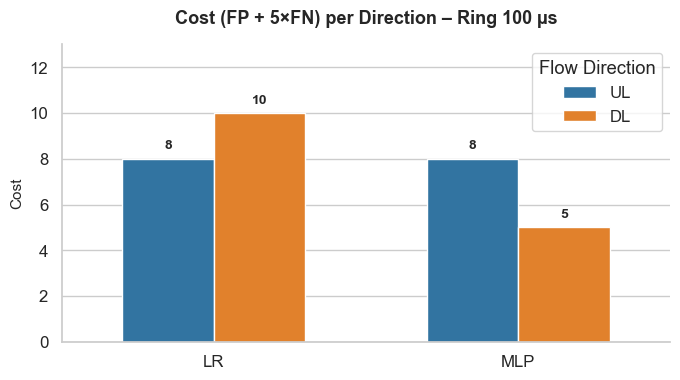

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.1)

cost_table = pd.DataFrame({
    "Model": ["LR", "LR", "MLP", "MLP"],
    "Direction": ["UL", "DL", "UL", "DL"],
    "Cost": [8, 10, 8, 5]
})

plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=cost_table,
    x="Model", y="Cost", hue="Direction",
    palette=["#1f77b4", "#ff7f0e"],  
    width=0.6,
    # edgecolor='black'
)


for p in ax.patches:
    height = p.get_height()
    if height > 0.3:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height + 0.3),
            ha='center', va='bottom',
            fontsize=10,
            fontweight='semibold'
        )

ax.set_title("Cost (FP + 5×FN) per Direction – Ring 100 µs", fontsize=13, pad=15, weight='bold')
ax.set_xlabel("")
ax.set_ylabel("Cost", fontsize=11)
ax.set_ylim(0, max(cost_table["Cost"]) + 3)

ax.legend(title="Flow Direction", loc='upper right', frameon=True)
sns.despine()
plt.tight_layout()
plt.show()


## Linear Regression comparisson

In [ ]:

file_path = "dataset\MESH_data_backup.txt"
dfm = pd.read_csv(file_path, delimiter="\t")


print("\n Dataset Info:")
print(dfm.info())


print("\n First 5 rows of the dataset:")
display(dfm.head())


print("\n Missing Values per Column:")
print(dfm.isnull().sum())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               86400 non-null  int64  
 1   netName          86400 non-null  object 
 2   brVariability    86400 non-null  int64  
 3   flowName         86400 non-null  object 
 4   flowTypeId       86400 non-null  int64  
 5   priority         86400 non-null  int64  
 6   trWindow         86400 non-null  float64
 7   bitrate          86400 non-null  float64
 8   burstSize        86400 non-null  int64  
 9   latLimit         86400 non-null  int64  
 10  hops             86400 non-null  int64  
 11  buffers          86400 non-null  int64  
 12  latStatic        86400 non-null  float64
 13  latWCmodel       86400 non-null  float64
 14  latSim           86400 non-null  float64
 15  latHPsum         86400 non-null  float64
 16  latEPsum         86400 non-null  float64
 

,id,netName,brVariability,flowName,flowTypeId,priority,trWindow,bitrate,burstSize,latLimit,...,latEPotherINsum,latLPsum,latOverallWC,latOverallSim,latCheck,net,topType,nodes,RUs,mu
0,0,MESH20_RU10,0,FH_UL,0,2,0.000033,22.5980,61,111,...,5.6437,1.85040,73.455,71.148,OK,MESH,3,20,10,1
1,1,MESH20_RU10,0,MH_UL,2,0,0.000033,3.3340,9,1000,...,0.0000,0.00000,103.190,101.290,OK,MESH,3,20,10,1
2,2,MESH20_RU10,0,FH_DL,1,2,0.000033,22.9680,62,111,...,0.0000,1.11020,67.719,67.659,OK,MESH,3,20,10,1
3,3,MESH20_RU10,0,MH_DL,3,0,0.000033,4.4454,12,1000,...,0.0000,0.00000,112.540,105.220,OK,MESH,3,20,10,1
4,4,MESH20_RU10,0,FH_UL,0,2,0.000033,22.5980,61,57,...,0.0000,0.37008,42.231,42.230,OK,MESH,3,20,10,1



 Missing Values per Column:
id                 0
netName            0
brVariability      0
flowName           0
flowTypeId         0
priority           0
trWindow           0
bitrate            0
burstSize          0
latLimit           0
hops               0
buffers            0
latStatic          0
latWCmodel         0
latSim             0
latHPsum           0
latEPsum           0
latEPsumMax        0
latEPsameINsum     0
latEPotherINsum    0
latLPsum           0
latOverallWC       0
latOverallSim      0
latCheck           0
net                0
topType            0
nodes              0
RUs                0
mu                 0
dtype: int64


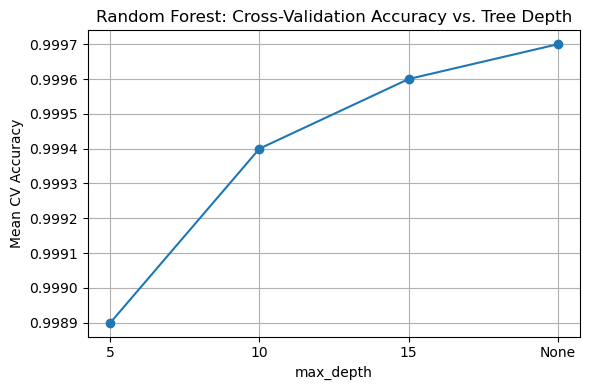

In [1]:
import matplotlib.pyplot as plt

depths = [5, 10, 15, None]
accuracies = [0.9989, 0.9994, 0.9996, 0.9997]

depth_labels = ['5', '10', '15', 'None']

plt.figure(figsize=(6, 4))
plt.plot(depth_labels, accuracies, marker='o')
plt.title('Random Forest: Cross-Validation Accuracy vs. Tree Depth')
plt.xlabel('max_depth')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_depth_accuracy.png")


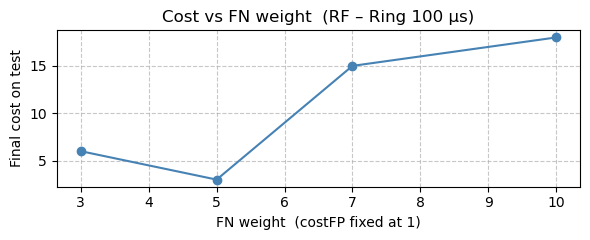

In [ ]:
import matplotlib.pyplot as plt


fn_weights = [3, 5, 7, 10]
rf_costs = [6, 3, 15, 18]

plt.figure(figsize=(6, 2.5))
plt.plot(fn_weights, rf_costs, marker='o', color='steelblue')
plt.title("Cost vs FN weight  (RF – Ring 100 µs)")
plt.xlabel("FN weight  (costFP fixed at 1)")
plt.ylabel("Final cost on test")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


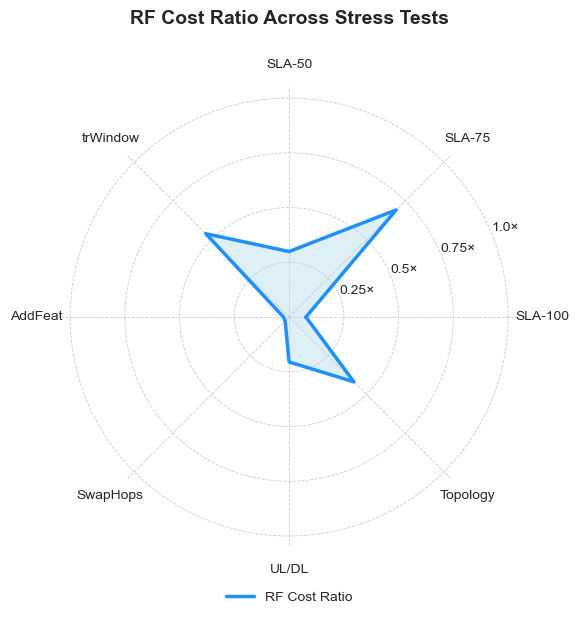

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = [
    "SLA-100", "SLA-75", "SLA-50", 
    "trWindow", "AddFeat", "SwapHops", 
    "UL/DL", "Topology"
]


wc_costs = [39, 214, 1120, 39, 39, 39, 39, 2357]
rf_costs = [3, 148, 335, 21, 1, 1, 8, 987]


ratios = [rf/wc for rf, wc in zip(rf_costs, wc_costs)]


ratios += ratios[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(7.5, 6.5), subplot_kw=dict(polar=True))


ax.plot(angles, ratios, linewidth=2.5, color='dodgerblue', label='RF Cost Ratio')
ax.fill(angles, ratios, color='lightblue', alpha=0.4)


ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0.25×", "0.5×", "0.75×", "1.0×"], fontsize=10)
ax.set_ylim(0, 1.05)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
for label, angle in zip(ax.get_xticklabels(), angles):
    label.set_horizontalalignment('center')
    label.set_rotation(np.degrees(angle))
    label.set_rotation_mode('anchor')


ax.set_title("RF Cost Ratio Across Stress Tests", fontsize=14, weight='bold', y=1.12)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize=10, frameon=False)


ax.spines['polar'].set_visible(False)
ax.grid(True, linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()


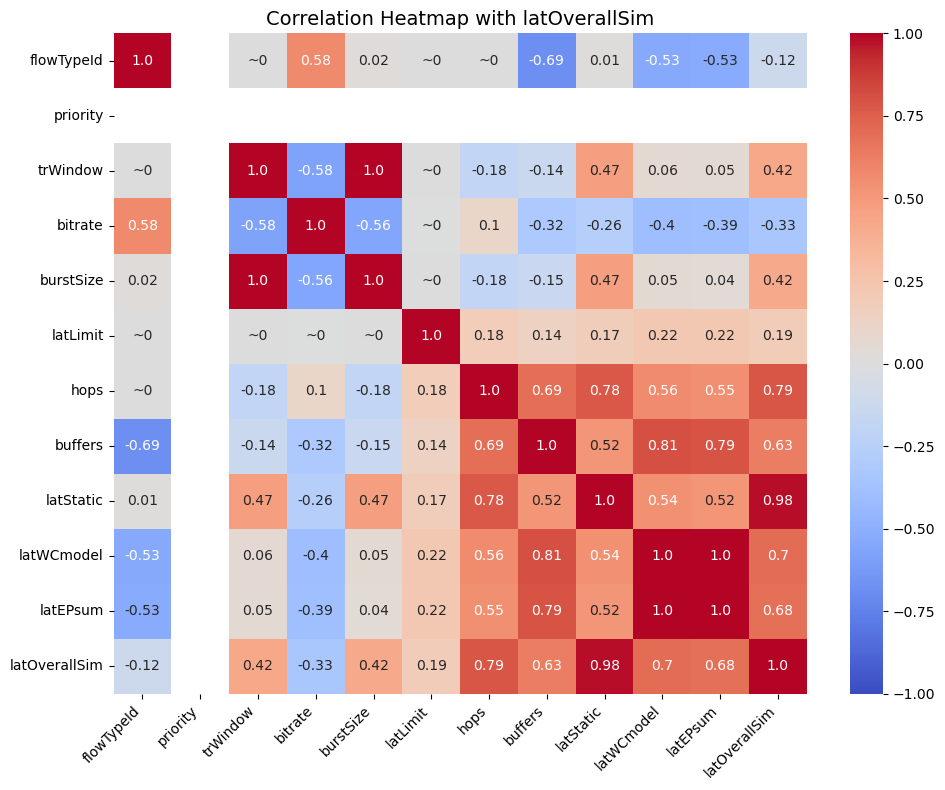

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("dataset/RING_data_backup.csv")


features_full = [
    "flowTypeId", "priority", "trWindow", "bitrate", "burstSize", 
    "latLimit", "hops", "buffers", "latStatic", "latWCmodel", 
    "latEPsum", "latOverallSim"
]


df_filtered = df[df["flowName"].isin(["FH_UL", "FH_DL"])][features_full].copy()


corr_matrix = df_filtered.corr()


rounded = corr_matrix.applymap(lambda x: "~0" if abs(x) < 0.01 else round(x, 2))


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=rounded, cmap="coolwarm", fmt="", vmin=-1, vmax=1,
            annot_kws={"size": 10})
plt.title("Correlation Heatmap with latOverallSim", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("heatmap_full_features_cleaned.png", dpi=300)
plt.show()


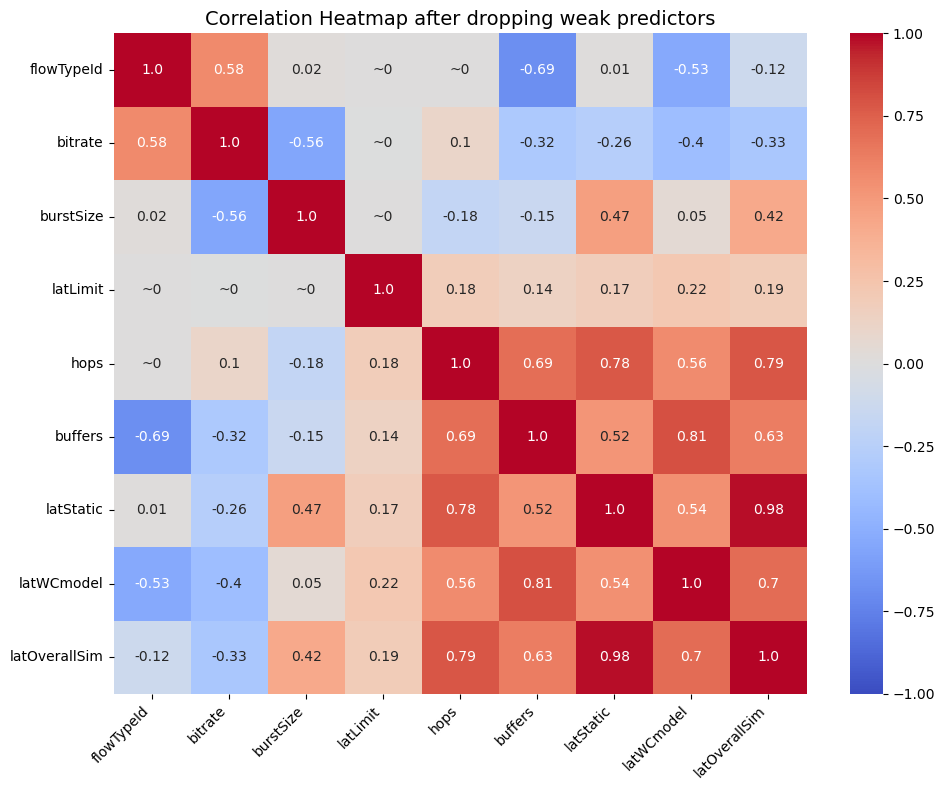

In [ ]:

features_reduced = [
    "flowTypeId", "bitrate", "burstSize", "latLimit", 
    "hops", "buffers", "latStatic", "latWCmodel", 
    "latOverallSim"
]


df_reduced = df[df["flowName"].isin(["FH_UL", "FH_DL"])][features_reduced].copy()
corr_reduced = df_reduced.corr()


rounded_reduced = corr_reduced.applymap(lambda x: "~0" if abs(x) < 0.01 else round(x, 2))


plt.figure(figsize=(10, 8))
sns.heatmap(corr_reduced, annot=rounded_reduced, cmap="coolwarm", fmt="", vmin=-1, vmax=1,
            annot_kws={"size": 10})
plt.title("Correlation Heatmap after dropping weak predictors", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("heatmap_reduced_features_cleaned.png", dpi=300)
plt.show()


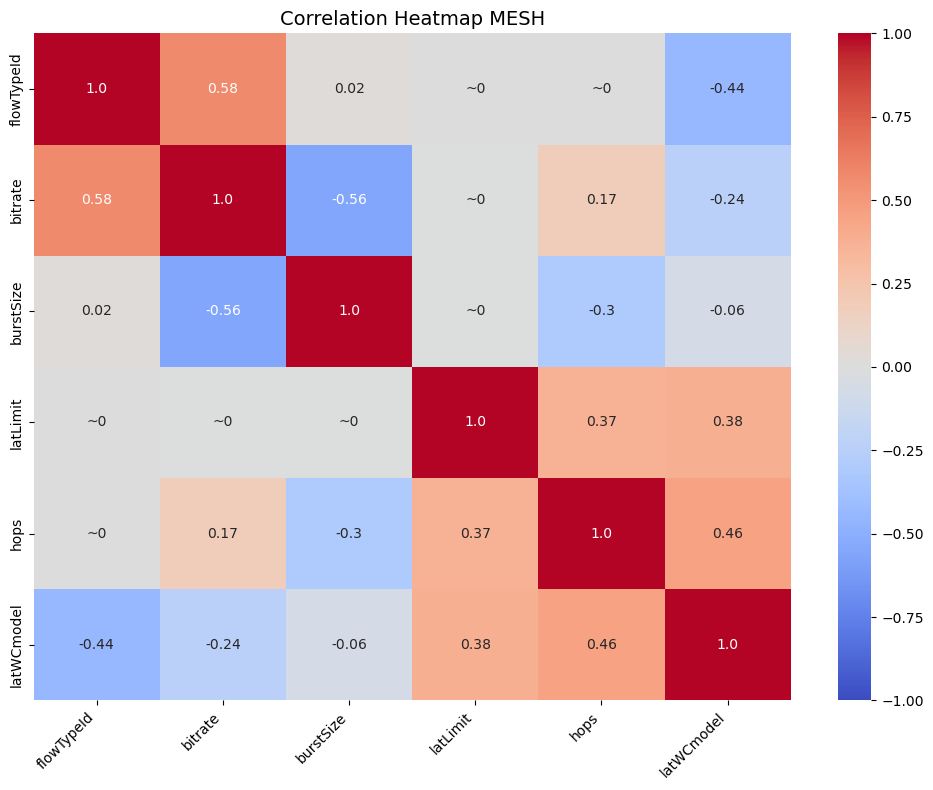

In [ ]:
feature_corr_test = [
"flowTypeId", "bitrate", "burstSize", "latLimit", "hops", "latWCmodel"
]


mask_fh = df_mesh_original["flowName"].isin(["FH_UL","FH_DL"])
df_test_corr = df_mesh_original.loc[mask_fh, feature_corr_test].copy()

corr_matrix_test = df_test_corr.corr()
rounded = corr_matrix_test.applymap(lambda x: "~0" if abs(x) < 0.01 else round(x, 2))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_test, annot=rounded, cmap="coolwarm", fmt="", vmin=-1, vmax=1,
            annot_kws={"size": 10})
plt.title("Correlation Heatmap MESH", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()